## Project Overview - Sentiment Analysis 

This project focuses on developing a machine learning model for sentiment analysis of cryptocurrency news, tailored to provide insights for a simple trading bot. The model aims to classify news texts into basic sentiment categories and quantify the strength of these sentiments. The key features and considerations of this project are outlined below:

### Basic Sentiment Classification
- **Objective**: Classify the sentiment of cryptocurrency news articles into 'positive,' 'neutral,' and 'negative.'
- **Importance**: This forms the foundation of our sentiment analysis, crucial for understanding market sentiment and guiding trading decisions.

### Sentiment Intensity Scoring
- **Objective**: Provide a sentiment intensity score to measure how strongly an article expresses a particular sentiment.
- **Relevance to Trading**: This score helps gauge the potential impact of news on cryptocurrency market movements, offering a nuanced view beyond basic categorization.

### Focus on Simplicity and Efficiency
- **Project Context**: As a final portfolio project for Codecademy's Machine Learning course, the aim is to create a model that aligns with the educational goals of the course, emphasizing simplicity and practicality.
- **Integration with Trading Bot**: The model is designed with the potential to integrate with a simple trading bot. 
- **Future Expansion**: While the current scope is kept manageable for educational purposes, the project lays the groundwork for future enhancements and more complex features.

# Sentiment Analysis of Cryptocurrency News Articles
## Introduction

This Jupyter Notebook is focused on the sentiment analysis of cryptocurrency news articles. The objective is to investigate how news content relates to the sentiment and potential market movements in the cryptocurrency domain. Through this analysis, we aim to understand the influence of news articles on cryptocurrency market sentiments and trends.

The dataset, "SahandNZ/cryptonews-articles-with-price-momentum-labels", consists of news articles sourced from Cryptonews.com and Binance.com. It includes the articles' text, publication dates, source URLs, and sentiment labels, providing a comprehensive view of the news impact on cryptocurrency market dynamics.

In the following sections, we will engage in data loading, preprocessing, exploratory data analysis, and building a machine learning model. The goal is to develop a robust model that can accurately interpret and classify the sentiment of each news article and draw meaningful insights about its potential impact on the cryptocurrency market.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Loading the Dataset
This cell loads the dataset 'SahandNZ/cryptonews-articles-with-price-momentum-labels' using the Hugging Face 'datasets' library.


In [2]:
dataset = load_dataset("SahandNZ/cryptonews-articles-with-price-momentum-labels")


### Preparation of Datasets for Machine Learning Workflow

In this project, we have three distinct datasets, each serving a specific purpose in the machine learning workflow:

- **Train Set (`train.csv`)**:
- **Date Range**: October 14, 2022, to March 1, 2023.
- Utilized for training the model, it contains historical data up to the beginning of March 2023.

- **Validation Set (`validation.csv`)**:
- **Date Range**: March 1, 2023, to March 22, 2023.
- Used for validating the model's performance during the tuning phase, it picks up immediately after the training set.

- **Test Set (`test.csv`)**:
- **Date Range**: March 22, 2023, to May 31, 2023.
- Reserved for the final evaluation of the trained model, it covers the period following the validation set.

#### Concatenating Training and Validation Sets

For the initial stages of model development, including feature engineering and Exploratory Data Analysis, we combine the training and validation datasets, this is achieved using the `concatenate_datasets` function from the Hugging Face `datasets` library:


In [3]:
from datasets import concatenate_datasets

# Concatenate only the train and validation data
combined_dataset = concatenate_datasets([dataset['train'], dataset['validation']])


# Displaying Basic Information About the Combined Dataset

This cell displays basic information about the combined dataset. It prints the column names, the total number of entries in the dataset, and an example entry. This information is crucial for understanding the structure of our dataset, including the types of data it contains and a sample of what the data entries look like.


In [4]:
# Concatenate only the train and validation data
combined_dataset = concatenate_datasets([dataset['train'], dataset['validation']])

# Displaying Basic Information About the Combined Dataset
print("Column names:", combined_dataset.column_names)
print("Number of entries:", len(combined_dataset))

# Displaying an example entry
print("Example entry:", combined_dataset[0])


Column names: ['datetime', 'text', 'url', 'label']
Number of entries: 162310
Example entry: {'datetime': '2022-10-14', 'text': 'despite fact blockchainbased carbon credit marketplace held auction bear market cryptocurrency demand marketplace token remained high', 'url': 'https://cryptonews.com/news/bitcoin-price-and-ethereum-why-could-btc-go-after-20500.htm', 'label': 1}


## Overview of Combined Dataset

### Column Names and Structure
- The dataset consists of four columns: 
  - `datetime`: Indicates the date and time of the data entry.
  - `text`: Contains the main content of the article or news summary.
  - `url`: The URL from where the text data is sourced.
  - `label`: A sentiment label assigned to the text.

### Dataset Size
- The combined dataset comprises a total of 162,310 entries. This a significant number of entries, so we will later ensure that no duplicates are present.
### Example Entry
- An example entry from the dataset is as follows:
  - `datetime`: '2022-10-14'
  - `text`: 'despite fact blockchainbased carbon credit marketplace held auction bear market cryptocurrency demand marketplace token remained high'
  - `url`: '[https://cryptonews.com/news/bitcoin-price-and-ethereum-why-could-btc-go-after-20500.htm](https://cryptonews.com/news/bitcoin-price-and-ethereum-why-could-btc-go-after-20500.htm)'
  - `label`: 1
- This example provides a glimpse into the type of content and format we can expect in our dataset. It shows a summarized version of a cryptocurrency-related article, along with its publication date and source URL.

### Note
- The `label` column, which contains sentiment labels, will not be used in our machine learning model building as we aim to determine sentiment through our methods.

The information displayed here sets the stage for our comprehensive analysis of the dataset, which includes preprocessing, exploratory data analysis (EDA), and sentiment analysis using various NLP techniques.


## Data Preparation and Duplicate Removal

In this section, we focus on converting our combined dataset into a Pandas DataFrame for further analysis and cleaning. The dataset initially contains entries from both the training and validation sets.

### Steps:

1. **DataFrame Conversion**: We first convert the dataset into a Pandas DataFrame. This transformation allows for more flexible and powerful data manipulation using Pandas' functions.

2. **Initial Entry Count**: We print the total number of entries before any cleaning to understand the size of our dataset.

3. **Removing Duplicates**: To ensure the integrity of our analysis, we remove any duplicate entries from tnd 'label'. Only the first instance of any duplicate is kept.

4. **Post-Cleaning Entry Count**: After removing duplicates, we again print the total number of entries. This step is crucial to understand the impact of our cleaning process and to confirm that duplicates have been effectively removed.

By performing these steps, we ensure that our dataset is clean and ready for the subsequent stages of analysis.


In [5]:
# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame({column: combined_dataset[column] for column in combined_dataset.column_names})

In [6]:
# Checking the number of entries before removing duplicates
print("Number of entries before removing duplicates:", len(df))

# Removing duplicates
df = df.drop_duplicates(subset=['datetime', 'text', 'url' , 'label'], keep='first')

# Checking the number of entries after removing duplicates
print("Number of entries after removing duplicates:", len(df))


Number of entries before removing duplicates: 162310
Number of entries after removing duplicates: 6521


## Handling Duplicates in the Dataset

### Initial Dataset Size
- Prior to the removal of duplicates, our dataset comprised a substantial 162,310 entries. This sizable dataset indicates extensive coverage of cryptocurrency-related texts.

### Impact of Removing Duplicates
- After the removal of duplicate entries, the dataset was reduced to 6,521 unique entries.
- This significant reduction from 162,310 to 6,521 entries indicates that a large portion of the dataset contained duplicate information.

### Implications for the Project
- **Increased Data Quality**: Removing duplicates ensures that our analysis is based on unique and distinct data points, enhancing the accuracy and reliability of our results.
- **Focused Analysis**: With a more streamlined dataset, our analysis will be more focused, as each entry now represents a unique piece of information.
- **Potential for Deeper Insights**: The presence of a high number of duplicates might have previously masked nuanced insights. With the duplicates removed, we can potentially uncover more detailed and specific trends within the cryptocurrency domain.
- **Adjustment in Dataset Understanding**: This change in the dataset size will be taken into consideration in all subsequent analyses, including exploratory data analysis (EDA) and machine learning model training.

Overall, the removal of duplicates is a crucial step in data preprocessing, ensuring that our sentiment analysis and other NLP tasks are conducted on a dataset that accurately represents diverse viewpoints and information within the cryptocurrency field.


## Processing the 'datetime' Column

### Conversion to Datetime Objects
- The 'datetime' column in the dataset is initially a string format. To facilitate date-based analysis, we convert this column to pandas datetime objects using `pd.to_datetime()`. The `errors='coerce'` parameter ensures that any non-parsable strings are converted to NaT (Not a Time).

### Removal of Invalid Dates
- Rows where the 'datetime' conversion resulted in NaT are removed with `df.dropna(subset=['datetime'])`. This step ensures the integrity of the dataset by excluding entries with invalid or missing dates.

### Simplifying to Date Format
- After ensuring all datetime entries are valid, we simplify these entries to just the date component (year-month-day) using `df['datetime'].dt.date`. This is helpful for analyses that don't require the specific time of day.

### Identifying Date Range
- We determine the earliest and latest dates in the dataset using `min()` and `max()` functions. This information provides insights into the time span covered by our dataset.

### Outputting the Date Range
- Finally, we print the date range of the dataset, which gives us a clear understanding of the period covered by our data. This is crucial for contextualizing our analysis and understanding the temporal bounds of the information we are working with : 

In [7]:
# Convert the 'datetime' column to pandas datetime objects
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Remove any rows with NaT (not a time) in the 'datetime' column
df = df.dropna(subset=['datetime'])

# Now convert the datetime objects to just date
df['datetime'] = df['datetime'].dt.date

# Find the earliest and latest dates
earliest_date = df['datetime'].min()
latest_date = df['datetime'].max()

# Print the date range
print(f"Date Range of Combined Dataset: {earliest_date} to {latest_date}")



Date Range of Combined Dataset: 2022-10-14 to 2023-03-22


The output "Date Range of Combined Dataset: 2022-10-14 to 2023-03-22" confirms that the combined dataset encompasses the expected time frame. This range aligns with the predefined scopes of our train set (up to March 1, 2023) and validation set (March 1, 2023, to March 22, 2023), as outlined in the project's data segmentation strategy.

# Checking Text Format Consistency

Before proceeding with further text preprocessing, it's important to check the consistency and quality of the articles in our dataset. In this section, we will sample a few random articles to visually inspect their format. This step is essential to identify any anomalies or variations in the text data that might require additional preprocessing.


In [8]:
import random

# Set a seed for reproducibility
random.seed(0)

# Sample 5 random articles from the 'text' column in the dataset
random_articles = random.sample(list(df['text']), 5)

# Display the sampled articles
print("Randomly sampled articles:")
for i, article in enumerate(random_articles, 1):
    print(f"Article {i}:")
    print(article)
    print("-----------------------------------------------------\n")


Randomly sampled articles:
Article 1:
worlds markets pressure november 28 investor concern grew effect seen cryptocurrency industry entire crypto market falling 3 previous day moreover given strong correlation price cryptocurrency stock markets btcusd remains risky asset explains recent decline
-----------------------------------------------------

Article 2:
increases difficulty level bitcoin mining generally follow increases hash rate network amount computational power dedicated mining bitcoin globally hashrate rises difficulty also rises ensure blockchain maintains average time 10 minutes block mined
-----------------------------------------------------

Article 3:
1 taro currently selling 0020 usdt bought using either usdt eth although price rise 0025 second stage presalevisit robotera
-----------------------------------------------------

Article 4:
statistics also showed officers asked courts let confiscate cryptoassets 13 separate cases year 2021 officers made 36 requests made e

The articles contain a mix of simple and complex vocabulary, technical terms, and potentially domain-specific jargon, indicating a varied level of content complexity.

## Current State of Data

Upon careful review, we have observed that the dataset has already undergone substantial preprocessing. The text data is presented in a summarized format and appears to be clean and uniformly structured. This initial preprocessing prepares the dataset for our Exploratory Data Analysis (EDA). However, it's important to note that essential NLP steps such as tokenization and normalization are yet to be performed. These steps will be undertaken in subsequent stages of our project to ensure the text data is optimally prepared for in-depth analysis and feature extraction. This approach will allow us to tailor these processes specifically to the needs of our sentiment analysis task, particularly considering the unique characteristics of cryptocurrency-related texts.


# Exploratory Data Analysis (EDA)

In this section, we will dive into Exploratory Data Analysis to gain deeper insights into our dataset. EDA will help us understand the underlying structure and characteristics of the data, which is crucial for informed model building and analysis.

## Key Focus Areas for EDA:

- **Sentiment Distribution:** Understanding how sentiments are distributed across the dataset.
- **Article Length Analysis:** Examining the length of the news articles.
- **Common Words and Phrases:** Identifying frequent words and phrases to discern prevalent topics and themes in the cryptocurrency news domain.
- **Temporal Trends:** Analyzing how the volume and sentiment of articles vary over time.

These insights will not only aid in building a more effective sentiment analysis model but also provide context for interpreting the model's results.


## Sentiment Distribution
Analyzing the sentiment distribution is crucial to understand the balance or skewness in sentiments across the dataset. This insight can inform how we might handle imbalanced data during model training.


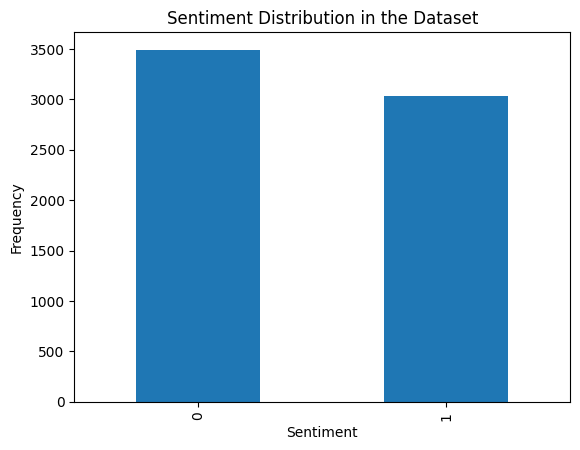

In [9]:
df['label'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


## Analysis of Sentiment

The bar chart above presents the distribution of sentiments within cryptocurrency-related news articles, based on our training and validation datasets. Each bar corresponds to a sentiment class, with the frequency of articles in each class displayed.

### Key Observations:

- **Class Imbalance**: There is a noticeable difference in the frequency of articles between the two sentiment classes. The class labeled "0" has a higher occurrence compared to the class labeled "1", suggesting a skew towards a negative sentiment within the dataset.

- **Nature of Cryptocurrency News**: The prevalence of negative sentiment might reflect the nature of the news articles collected during this period. It could indicate that the events or developments in the cryptocurrency market at this time were predominantly viewed negatively.

- **Impact on Model Training**: The imbalance between the sentiment classes will be taken into account during the model training process. Techniques such as class weighting, oversampling of the minority class, or undersampling of the majority class may be applied to address this imbalance.

- **Evaluation Metrics**: Due to the class imbalance, accuracy alone will not be a sufficient metric for model evaluation. Balanced metrics such as the F1 score, precision, recall, and the ROC-AUC curve will be utilized to provide a more holistic view of model performance.

### Concluding Remarks:

The sentiment distribution seen here is instrumental in guiding the development and evaluation of our sentiment analysis model. It underscores the importance of considering the distribution of classes within the dataset and adjusting our model training and validation strategies accordingly.

Further exploration into the reasons behind the sentiment distribution, such as correlating with specific market events or news developments, could offer additional insights. By doing so, we aim to build a model that not only accurately predicts sentiment but also reflects the underlying trends and nuances of cryptocurrency news sentiment.


## Article Length Analysis
Investigating the length of news articles can reveal patterns about the verbosity and content density. This analysis might highlight outliers or specific trends in article length.


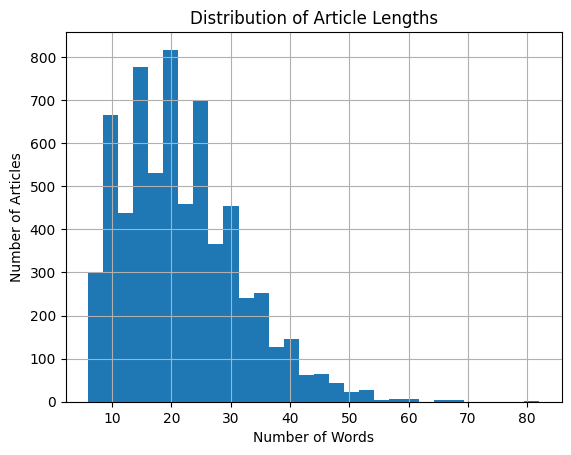

In [10]:
df['article_length'] = df['text'].apply(lambda x: len(x.split()))
df['article_length'].hist(bins=30)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Articles')
plt.show()


## Analysis of Article Lengths

The histogram above illustrates the distribution of article lengths across the combined training and validation datasets. Each bin represents the count of articles corresponding to a specific length measured by the number of words.

### Key Observations:

- **Common Article Lengths**: The distribution shows that a majority of the articles fall within a certain range of word counts. Specifically, there is a noticeable concentration of articles with word counts in the lower end of the spectrum.

- **Right-Skewed Distribution**: The distribution is right-skewed, indicating that while most articles are shorter, there is a long tail of articles that are much longer. This skewness points to the presence of detailed reports or analyses among a sea of shorter articles.

- **Implications for Sentiment Analysis**: This varied length distribution suggests that the sentiment conveyed in articles does not depend on their length. Shorter articles can be just as informative and sentiment-laden as longer ones. Therefore, our sentiment analysis model must be adept at extracting sentiment from texts of all lengths.

- **Preprocessing Considerations**: Given the range of article lengths, our text preprocessing strategy must be carefully devised. We want to retain as much informative content as possible, even from shorter articles, without diluting the dataset with overly verbose texts.

- **Feature Engineering**: When engineering features for our model, special attention will be paid to ensure that features capture the sentiment effectively, regardless of article length. This may involve focusing on keyword extraction and contextual understanding rather than relying on word count.

### Concluding Remarks:

The insights gained from the distribution of article lengths will directly influence our approach to building the sentiment analysis model. Recognizing that valuable sentiment can be expressed concisely, we will develop a model and preprocessing pipeline that honor the content's integrity, regardless of length. This analysis reinforces the notion that brevity does not equate to a lack of sentiment or substance in the context of cryptocurrency news articles.


## Common Words and Phrases
Examining common words and phrases can uncover the most frequent topics in the news articles. This helps in understanding the focus areas in the cryptocurrency news domain.


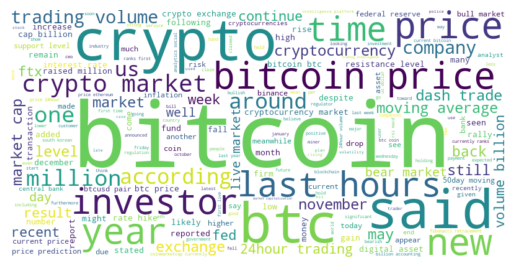

In [11]:
from wordcloud import WordCloud
all_text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Word Cloud Analysis
The word cloud depicted here graphically represents the prominence of various terms, underscoring the most discussed topics in the cryptocurrency narrative.

### Key Observations:
- **Dominant Cryptocurrency Terms**: The significant presence of terms such as "bitcoin," "crypto," and "price" underscores the focus on cryptocurrency valuations and market movements.
- **Market Sentiments and Timeframes**: Words like "bull" and "bear" along with "last hours" and "week" suggest a concentration on short-term market sentiments and trends.
- **Trading and Financial Analysis**: Technical terms such as "trading," "volume," and "market cap" are indicative of the analytical nature of the articles, likely providing insights into trading activities and market capitalization.
- **Economic and Fiscal References**: The occurrence of "interest rate" and "federal reserve" signals that the articles also touch upon macroeconomic elements and fiscal policies affecting the cryptocurrency market.
- **Frequent Entities**: The notable size of words like "company," "time," and "year" highlights the frequent discussion of corporate activities and time-sensitive information within the domain.

### Concluding Insights:
This word cloud analysis grants us a snapshot of the most pertinent themes within our dataset, elucidating the focal points in cryptocurrency news articles. These dominant themes are pivotal in tailoring our sentiment analysis model to the nuances of the market discourse. The insights gained from this visualization are crucial for the subsequent stages of data preparation and feature engineering, ensuring that our model is attuned to the prevalent conversations in the cryptocurrency sector.


 We will now perform an analysis to find and visualize the top 20 most common words found in cryptocurrency-related news articles :

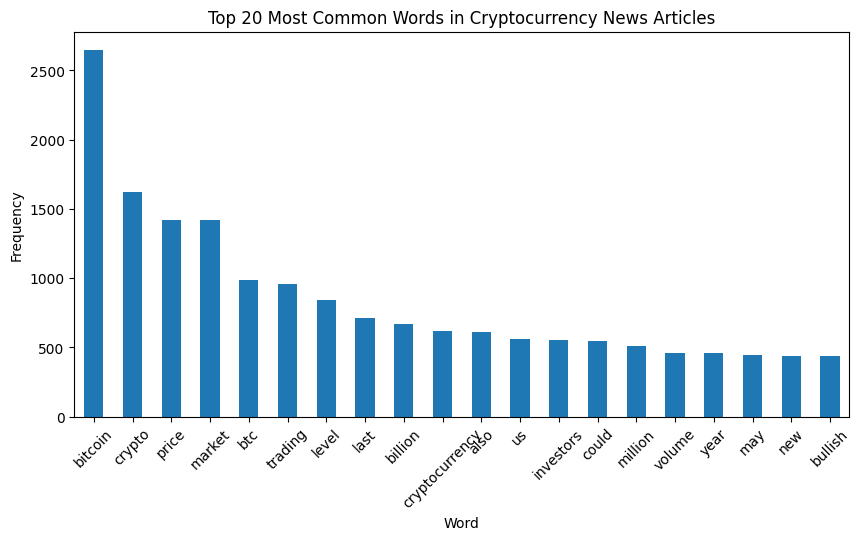

In [12]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Top 20 most common words
all_words = ' '.join(df['text']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Split the words and their counts into two lists for plotting
words, counts = zip(*most_common_words)

# Create a pandas DataFrame for easy plotting
df_common_words = pd.DataFrame({'Word': words, 'Frequency': counts})

# Plot the DataFrame
df_common_words.set_index('Word').plot(kind='bar', figsize=(10, 5), legend=False)
plt.title('Top 20 Most Common Words in Cryptocurrency News Articles')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Top 20 Most Common Words in Cryptocurrency News Articles

This bar chart represents the frequency of the top 20 most common words found in cryptocurrency news articles. The x-axis lists the words, and the y-axis shows how often each word appears in the dataset.

Observations:
- "Bitcoin" is the most frequently occurring word, highlighting its dominance in the cryptocurrency news space.
- Financial terms like "price", "market", and "trading" are commonly used, indicating a focus on the economic aspects of cryptocurrencies.
- Words like "investors", "billion", and "million" suggest that the news articles often discuss the financial stakes and the scale of investment in the cryptocurrency market.

This visualization aids in understanding the focus areas of cryptocurrency news articles, which can be beneficial for sentiment analysis, market trend prediction, and understanding public interest.


## Temporal Trends
Temporal analysis will show how the number of articles and sentiments change over time, which may indicate market reactions to certain events or general trends in the cryptocurrency domain.


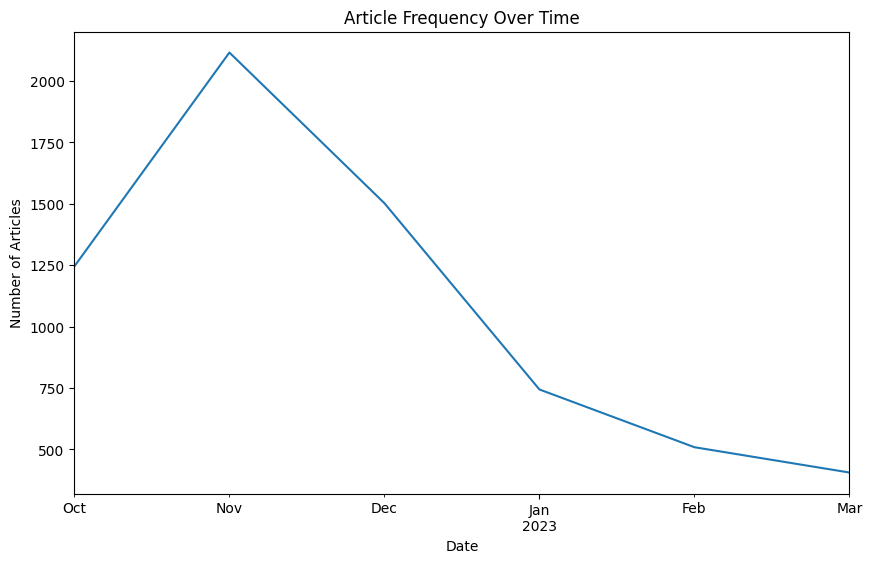

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Check if 'datetime' is the index
if 'datetime' not in df.columns:
    # 'datetime' is likely the index, so reset it temporarily
    df.reset_index(inplace=True)

# Convert the 'datetime' column back to datetime objects if not already done
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' as the index again
df.set_index('datetime', inplace=True)

# Resample the data by month and count the number of articles
monthly_article_count = df['text'].resample('M').count()

# Plotting with explicit x-axis limits
start_date = pd.to_datetime("2022-10-01")
end_date = pd.to_datetime("2023-03-01")

plt.figure(figsize=(10, 6))
monthly_article_count.plot()
plt.title('Article Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xlim(start_date, end_date)  # Setting explicit x-axis limits
plt.show()





## Interpretation of Temporal Trends in Article Production

The line chart titled "Article Frequency Over Time" illustrates the monthly fluctuation in the publication of cryptocurrency-related news articles within the given date range of our dataset.

### Key Observations:
- **Peak Publishing Activity**: There is a distinct peak in November, indicating a heightened volume of articles. This could be a response to significant events or market changes within the cryptocurrency world at that time.
- **Post-Peak Decline**: After the November peak, there is a sharp decrease in December, suggesting that the factors contributing to the November peak may have been event-specific or that December saw a normalization in reporting frequency.
- **Gradual Decline**: From January onwards, there is a gradual decrease in the number of articles, which could suggest a reduction in newsworthy events, a shift in media focus, or seasonal variations in reporting.

### Concluding Insights:
This graph offers insight into the pattern of news coverage related to cryptocurrencies and could be indicative of the market's health and public interest. It sets the stage for additional analysis, such as correlating these trends with market behavior, to understand the relationship between news coverage and market dynamics.

In summary, the visualization captures essential trends in the volume of cryptocurrency news articles. It highlights periods of intense reporting and could serve as a starting point for further examination of the catalysts behind these trends.


## Sentiment Over Time Analysis

In the following analysis, we aim to understand how the sentiment expressed in cryptocurrency-related news articles has evolved over time. We perform a temporal analysis that might reveal patterns, trends, or anomalies in the dataset, potentially corresponding to market movements or key events in the cryptocurrency sector.

### Code Explanation:

1. **Datetime Conversion**:
   We have already ensured, in a previous step, that all entries in the 'datetime' column of our DataFrame are proper datetime objects. This standardization is crucial for accurate time series analysis.

2. **Indexing by Datetime**:
   The 'datetime' column is then set as the index of our DataFrame, allowing us to leverage pandas' powerful time series functionalities.

3. **Monthly Resampling**:
   We resample our data on a monthly basis to count the number of articles associated with each sentiment label for each month. This aggregation gives us a clearer view of the sentiment trends over an extended period.

4. **Value Counts and Stacking**:
   We count the number of occurrences of each sentiment label ('0' for negative, '1' for positive) within these monthly intervals. Using the `unstack` method, we prepare the data for a stacked bar chart, which presents both positive and negative sentiments in a single column for each month, differentiated by color.

5. **Visualization**:
   The resulting DataFrame is plotted as a stacked bar chart, which visually represents the monthly distribution of sentiments. The chart's title, axes labels, and legend are set to make the plot self-explanatory.

By examining the fluctuations in the number of articles with different sentiments over time, we can infer periods of increased optimism or pessimism in the cryptocurrency domain. Such insights could be valuable for understanding the public sentiment's impact on market behavior or for predicting future market trends based on histormore nuanced conclusions.

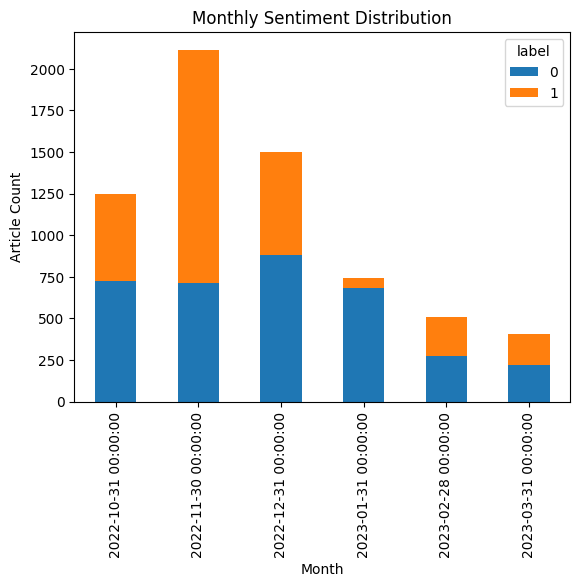

In [14]:
import matplotlib.pyplot as plt

# Verify if the index is a DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    raise TypeError("Index is not a DatetimeIndex")

# Group by the index with a monthly frequency and count the occurrences
monthly_sentiment = df.groupby([pd.Grouper(freq='M'), 'label']).size().unstack(fill_value=0)

# Plot the results
monthly_sentiment.plot(kind='bar', stacked=True)
plt.title('Monthly Sentiment Distribution')
plt.xlabel('Month')
plt.ylabel('Article Count')
plt.show()


## Monthly Sentiment Distribution Analysis

The "Monthly Sentiment Distribution" graph illustrates the number of cryptocurrency-related news articles categorized by sentiment over time. Each stacked bar represents a month's total articles, segmented into negative (blue) and positive (orange) sentiments.

### Key Observations:

- **Sentiment Fluctuations**: The distribution shows how sentiment in cryptocurrency news varies from month to month. Notably, some months exhibit a higher prevalence of negative sentiment, while others show a more balanced distribution between negative and positive sentiments (0 = negative, 1 = positive).

- **Market Dynamics Reflection**: The varying heights of sentiment categories could reflect underlying market conditions. Periods with a higher count of negative sentiment articles may correspond with market downturns or unfavorable industry events, while more balanced or positive-leaning months could indicate bullish market trends or optimistic industry developments.

- **Interpreting Imbalances**: The presence of both sentiments in each month underlines the diversity of views within the cryptocurrency news space. However, the imbalances observed also suggest that sentiment may be swayed by transient events, which could have implications for market sentiment and investor behavior.

### Concluding Insights:

This sentiment distribution provides a valuable perspective on the emotional tone conveyed by the news media over the analyzed period. It reveals the pulse of the cryptocurrency market as captured by journalists and can serve as an indicator of the market's sentiment trajectory.

By understanding these patterns, we gain insights into the potential impact of news on market sentiment and investor decisions. This analysis is crucial for building a sentiment analysis model that accurately interprets the nuances of market sentiment and for investors seeking to understand the sentiment trends that may influence market dynamics.

## Summary of EDA for Cryptocurrency News Sentiment

Through our exploratory data analysis, we've uncovered several intriguing patterns and correlations in the cryptocurrency news dataset that offer insights into the dynamics of market sentiment as reflected in media coverage.

**Correlation Between Article Frequency and Sentiment**:
When comparing the "Article Frequency Over Time" and "Monthly Sentiment Distribution" plots, one might look for months where an increase in the number of articles correlates with a shift in sentiment. For example, if a peak in article volume aligns with a peak in positive sentiment, this could indicate that a particularly favorable event occurred, driving both increased coverage and a positive outlook.

**Impact of Article Length on Sentiment**:
By examining both the "Distribution of Article Lengths" and "Sentiment Distribution" plots, it's possible to speculate whether shorter or longer articles tend to be more positive or negative. For instance, if shorter articles dominate and there's a prevalence of negative sentiment, one could hypothesize that brief updates may be focused on immediate, potentially negative market reactions.

**Common Words as Sentiment Indicators**:
The "Top 20 Most Common Words" plot alongside the "Monthly Sentiment Distribution" may reveal that certain terms are more prevalent in months with a particular sentiment bias. Words like "bull" may appear more in months with positive sentiment, while "bear" may be more common in negative months.

**Word Frequency and Article Volume**:
The "Top 20 Most Common Words" plot can be juxtaposed with the "Article Frequency Over Time" plot to see if increases in article volume correspond to increased mentions of certain key terms. For instance, an increase in the use of the word "price" during a peak in article volume might indicate a period of significant price volatility.

**Sentiment Consistency Across Time**:
The general sentiment trend, seen in the "Sentiment Distribution in the Dataset" plot, could be compared with temporal trends to see if the sentiment is consistent over time or if it changes with the frequency of article publication. A consistently negative sentiment over months with varying article volumes could suggest underlying pessimism in the market.


We have now concluded the Exploratory Data Analysis (EDA) on the combined training and validation datasets. This phase has provided us with valuable insights into the distribution of sentiments, the frequency of articles over time, the distribution of article lengths, and the commonality of specific words within our corpus of cryptocurrency-related news article
The insights garnered from the EDA will guide us as we move forward with developing our machine learning pipeline. In the subsequent stages of model building and validation, we will revisit EDA to ensure that our model is robust and that our findings remain consistent across different data splits. This iterative approach to EDA is a cornerstone of a rigorous machine learning workflow, ensuring that our final model is both accurate and reliable.

## Feature Engineering on Combined Dataset

In this phase, we apply feature engineering to the combined dataset, which includes both training and validation sets. Our goal is to enhance the dataset's ability to accurately represent the sentiments in cryptocurrency news articles. Below are the steps we will follow:

### 1. Text Preprocessing and Feature Extraction
- **Tokenization**: We start by breaking down the articles into individual words or tokens. This step might already be done, but we will ensure consistency across our dataset. 
- **TF-IDF Vectorization**: This technique is used to transform our text data into a numerical format, highlighting the relative importance of words in the dataset.
- **Word Embeddings**: To capture deeper semantic meanings, we will employ pre-trained embeddings like Word2Vec or GloVe.
- **Sentiment-Specific Keywords**: Identifying and extracting words associated with positive, neutral, and negative sentiments will enhance our analysis.
- **N-grams Analysis**: We will use bi-grams or tri-grams to better understand the context of sentiments expressed in the articles.
- **Polarity Scores**: Tools like TextBlob or VADER will be utilized to obtain sentiment intensity scores for each article.

### 2. DateTime Feature Engineering
- **Date Components**: We will extract day, month, and year from the datetime column to investigate if sentiments have temporal patterns.

### 3. URL Feature Engineering
- **Domain Extraction**: Parsing the domain from the URL will help us identify potential biases based on the news source.

### 4. Feature Scaling and Transformation (If Necessary)
- We will apply feature scaling to our dataset, especially if we use models sensitive to data scale.

_Note_: As we have a designated test set covering the period from March 22, 2023, to May 31, 2023, we do not need to split the combined dataset further. This combined dataset will be utilized for model training and tuning, while the separate test set will be reserved for the final model evaluation.


## Importing Libraries

In this initial step, we import a range of essential libraries that will be used throughout the project. These libraries provide us with the necessary tools for text processing, feature extraction, sentiment analysis, data manipulation, and visualization:

In [15]:
# For text processing and feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize

# Additional libraries for sentiment analysis and other NLP tasks
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # For polarity scores
from nltk.corpus import stopwords  # For stopwords removal
from nltk.stem import WordNetLemmatizer  # For lemmatization

# General data manipulation and visualization libraries (already imported)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that NLTK components are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Tokenization of Text Data

In this step, we perform tokenization on the text data in our dataset. Tokenization is a fundamental process in natural language processing (NLP) where we convert a string of text into individual words or tokens. This process is essential for preparing the text for further analysis and feature extraction.

### Defining the Tokenization Function

We define a function `tokenize_articles`, which takes an article as input and returns a list of tokens. This function utilizes `word_tokenize` from the NLTK library to split the text into words.

### Applying Tokenization to the Dataset

The `tokenize_articles` function is applied to each article in the 'text' column of our DataFrame `df`. The result is stored in a new column `tokenized_text`, which contains the tokenized version of each article.

### Verifying the Tokenization

To ensure that our tokenization process is working correctly, we print the original text and its tokenized version for the first article in the dataset. This comparison allows us to visually confirm the effectiveness of the tokenization.



In [16]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Function for Tokenization
def tokenize_articles(article):
    return word_tokenize(article)

# Apply Tokenization to each article in the 'text' column
df['tokenized_text'] = df['text'].apply(tokenize_articles)

# Display a sample to verify tokenization
print("Original Text Sample:", df['text'].iloc[0])
print("Tokenized Text Sample:", df['tokenized_text'].iloc[0])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original Text Sample: despite fact blockchainbased carbon credit marketplace held auction bear market cryptocurrency demand marketplace token remained high
Tokenized Text Sample: ['despite', 'fact', 'blockchainbased', 'carbon', 'credit', 'marketplace', 'held', 'auction', 'bear', 'market', 'cryptocurrency', 'demand', 'marketplace', 'token', 'remained', 'high']


The comparison between the original and tokenized text confirms that the tokenization process is functioning as intended, successfully preparing the text for further NLP analysis.


## TF-IDF Vectorization

After tokenizing the text data, we now move to transform it into a numerical format using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. This method is crucial in text analysis as it reflects how important a word is in a document relative to a corpus.

### Initializing the TF-IDF Vectorizer

The `TfidfVectorizer` from scikit-learn is used for this purpose. We initialize it with a specified number of maximum features. In this case, we set `max_features` to 5000, but this can be adjusted based on the dataset's characteristics and the specific needs of the analysis.

### Applying TF-IDF Vectorization

The vectorizer is applied to the 'text' column of our DataFrame. It's important to note that we use the original, untokenized text for this step. TF-IDF vectorization internally handles its own tokenization and normalization processes.

### Converting TF-IDF Features to DataFrame

For better visualization and understanding, the TF-IDF features are converted into a DataFrame. This step is optional but can be particularly useful during exploratory data analysis to understand the feature space and the weight of different terms.

### Displaying the Results

We display the shape of the TF-IDF feature matrix and the first few rows of the resulting DataFrame. This provides insights into the structure of the data after vectorization and confirms the successful application of this method.

The TF-IDF features are now ready to be used in subsequent modeling and analysis tasks. They provide a rich and nuanced representation of the text data, emphasizing the importance of specific words in the context of the overall dataset.


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust the number of features as needed

# Apply TF-IDF Vectorization to the 'text' column of the DataFrame
# Note: We use the original text data, not the tokenized version, as TF-IDF handles its own tokenization
tfidf_features = tfidf_vectorizer.fit_transform(df['text'])

# Optional: Convert the TF-IDF features to a DataFrame for better visualization and understanding
import pandas as pd
tfidf_features_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF features and the first few rows of the DataFrame
print("Shape of TF-IDF Features:", tfidf_features.shape)
print(tfidf_features_df.head())


Shape of TF-IDF Features: (6521, 5000)
   0007  0013  0020  0023  0025  003  0041  0046  00476  005  ...  ytd  \
0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0  ...  0.0   
1   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0  ...  0.0   
2   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0  ...  0.0   
3   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0  ...  0.0   
4   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0    0.0  0.0  ...  0.0   

   yugioh  yusko  zero  zerocovid  zerofee  zhao  zone  zones  zscore  
0     0.0    0.0   0.0        0.0      0.0   0.0   0.0    0.0     0.0  
1     0.0    0.0   0.0        0.0      0.0   0.0   0.0    0.0     0.0  
2     0.0    0.0   0.0        0.0      0.0   0.0   0.0    0.0     0.0  
3     0.0    0.0   0.0        0.0      0.0   0.0   0.0    0.0     0.0  
4     0.0    0.0   0.0        0.0      0.0   0.0   0.0    0.0     0.0  

[5 rows x 5000 columns]


## Output Analysis of TF-IDF Vectorization

The TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization process has been successfully applied to our dataset, and the output provides insightful details about the transformed text data:

### Shape of the TF-IDF Feature Matrix
- The output "Shape of TF-IDF Features: (6521, 5000)" indicates that our dataset, comprising 6,521 articles, has been transformed into a matrix with 5,000 features.
- Each feature in this matrix represents a term (word) from the dataset, with the 5,000 features being the most significant words as identified by the TF-IDF algorithm.

### Structure of the TF-IDF DataFrame
- The displayed DataFrame shows the first five entries of our dataset in this new vectorized format.
- Each column in the DataFrame corresponds to one of the 5,000 terms, and each row represents an article.
- The values in the matrix are the TF-IDF scores. These scores reflect the importance of each term in an article relative to its frequency across all articles.
- A value of 0.0 in a cell indicates that the corresponding term is either not present in the article or is not considered significant in the context of the entire dataset.

### Observations on Sparse Nature
- The prevalence of 0.0 values throughout the matrix is noticeable. This sparsity is typical in TF-IDF matrices, as most terms do not occur in most documents.
- Sparse matrices like this are common in natural language processing and signify that our text data covers a wide range of vocabulary, but each document only contains a small subset of it.

### Sample Terms in the Matrix
- The terms (like '0007', '0013', 'yugioh', 'yusko', 'zero') shown in the output are a small sample of the features generated by the TF-IDF Vectorizer.
- Some of these terms may appear to be numerical or less contextually relevant. This occurrence is a characteristic of the TF-IDF process, especially when the number of features is limited by the `max_features` parameter.


## Displaying Non-Zero TF-IDF Values and Specific Terms

In this section, we explore the TF-IDF results in more detail:

- **Non-Zero TF-IDF Values**: We display the TF-IDF scores that are greater than zero for the first article. This helps us understand which terms are particularly significant in this specific article.
- **TF-IDF Scores for a Specific Term**: We examine the TF-IDF scores for a term of interest (e.g., 'bitcoin') across different documents. This allows us to gauge the term's relevance and importance throughout the entire dataset.


In [18]:
# Display non-zero TF-IDF values for the first document
non_zero_values = tfidf_features_df.iloc[0][tfidf_features_df.iloc[0] > 0]
print("Non-Zero TF-IDF Values for the First Article:")
print(non_zero_values)

# Display TF-IDF values for a specific term across different documents
term = 'bitcoin'  # Term of interest
if term in tfidf_vectorizer.get_feature_names_out():
    term_index = tfidf_vectorizer.get_feature_names_out().tolist().index(term)
    print(f"\nTF-IDF Values for the term '{term}':")
    print(tfidf_features[:, term_index].toarray())
else:
    print(f"\nTerm '{term}' not found in the feature names.")


Non-Zero TF-IDF Values for the First Article:
auction            0.315649
bear               0.192166
blockchainbased    0.265551
carbon             0.247764
credit             0.259136
cryptocurrency     0.144365
demand             0.216293
despite            0.190994
fact               0.232742
held               0.227981
high               0.194614
market             0.113607
marketplace        0.560785
remained           0.244295
token              0.170862
Name: 0, dtype: float64

TF-IDF Values for the term 'bitcoin':
[[0.        ]
 [0.10516664]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]


## Insights from TF-IDF Analysis

### Non-Zero TF-IDF Values for the First Article
The output for the first article reveals several terms with significant TF-IDF scores, indicating their relative importance within the text. Notably, 'marketplace' has the highest score, suggesting it is a prominent topic in the article. Other terms such as 'auction', 'blockchainbased', 'carbon', and 'credit' also have substantial scores, reflecting key concepts discussed in the article. The presence of these terms with non-zero TF-IDF values illustrates the document's focus areas.

### TF-IDF Values for the Term 'bitcoin'
The analysis of 'bitcoin' across the corpus using TF-IDF scores provides a nuanced view of the term's significance. Despite 'bitcoin' being highly frequent as per the raw term frequencies and the word cloud visualization, its TF-IDF scores are relatively low. This does not indicate a lack of prevalence, but rather that 'bitcoin' is a common term across the majority of documents. The TF-IDF metric down-weights terms that appear frequently across many documents, as they are less informative for distinguishing between documents. Hence, while 'bitcoin' is certainly a key term in the domain of cryptocurrency news, its ubiquity throughout the corpus means that its TF-IDF scores may not reflect its overall frequency, but rather its relative importance in distinguishing individual documents.



## Statistical Measures and Visualization of TF-IDF Scores

In this analysis, we conduct a statistical examination and visualization of the TF-IDF scores, which highlights the relevance of particular terms within our collection of documents.

### Average TF-IDF Scores
We compute the average TF-IDF score for each term throughout the entire dataset. This metric reveals the terms with the greatest overall significance, indicating which are most characteristic and important.

### Bar Chart Visualization
A bar chart is employed to clearly depict the TF-IDF scores for the top terms in a specific document. This visualization is selected for its directness and interpretability. The bar chart for a chosen document — in this instance, Document 0 — illustrates the five terms that exhibit the highest TF-IDF scores. Each bar is color-coded and annotated with its precise score, offering an at-a-glance understanding of each term's relative importance within that document.


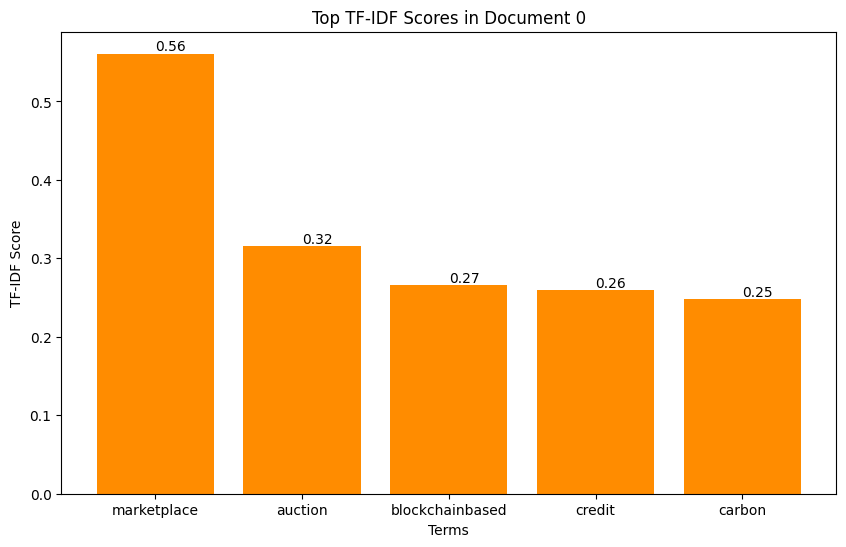

In [19]:
import matplotlib.pyplot as plt

# Select top 5 terms for a specific document
doc_id = 0  # Article we want to analyze
top_terms = tfidf_features_df.iloc[doc_id].sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))  # Larger figure size for better visibility
bars = plt.bar(top_terms.index, top_terms.values, color='darkorange')  # Use a more contrasting color

# Adding annotations on top of each bar if required
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # Annotate the height of the bar

plt.title(f"Top TF-IDF Scores in Document {doc_id}")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.show()

The bar chart of TF-IDF scores for Document 0 provides a clear visualization of term importance, with 'marketplace' standing out as the most significant term. Terms such as 'auction', 'blockchainbased', 'credit', and 'carbon' also feature prominently, indicating key areas of focus within the document. The disparity in scores suggests a varied emphasis on different aspects of the content, with 'marketplace' potentially being a central theme.

## Transition from TF-IDF to Word Embeddings (Word2Vec)

Having completed our analysis with TF-IDF vectorization, we now transition to exploring Word Embeddings, specifically using Word2Vec. This step is a progression in our feature extraction process, aiming to capture deeper semantic meanings in our text data that TF-IDF might not fully encompass.

### Why Word2Vec?
While TF-IDF has been instrumental in highlighting the relative importance of words in our dataset, Word2Vec provides a different approach by generating dense word vectors. This technique is particularly effective in capturing the context of words, their relationships, and subtleties in meaning that are often crucial in sentiment analysis. By converting words into these dense vectors, we can potentially uncover more nuanced patterns and insights in our cryptocurrency-related articles.

### Implementation Plan
1. **Word2Vec Training**: We will train a Word2Vec model on our combined dataset (training and validation sets). This model will learn word associations directly from our text, offering us vectors that are tailored to the specific language and terminology of the cryptocurrency domain.
2. **Vectorizing Text**: Post-training, we will use the Word2Vec model to transform our text data into word vectors. These vectors will then be used to create features for each document, effectively capturing the essence of the text in a form suitable for machine learning algorithms.
3. **Integration with ML Workflow**: The word embeddings generated by Word2Vec will be integrated into our existing machine learning workflow. This integration will involve using these embeddings as input features for our models, alongside or in place of our TF-IDF features, depending on the comparative analysis results.

By incorporating Word2Vec, we anticipate gaining a more profound understanding of the sentiments and themes present in our dataset, which could lead to more accurate and insightful sentiment analysis results.

In [20]:
from gensim.models import Word2Vec
import multiprocessing

# Prepare data for Word2Vec training
tokenized_text = df['tokenized_text'].tolist()

# Word2Vec model parameters
vector_size = 100
window = 5
min_count = 2
workers = multiprocessing.cpu_count()

# Train the Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

# Summarize the model
print("Word2Vec model details:")
print(w2v_model)

# Save the model
w2v_model.save("crypto_word2vec.model")

# Inspect a word vector (example: 'bitcoin')
print("\nExample word vector ('bitcoin'):")
print(w2v_model.wv['bitcoin'])


Word2Vec model details:
Word2Vec<vocab=7359, vector_size=100, alpha=0.025>

Example word vector ('bitcoin'):
[-0.39911297  0.26588112  0.36701968  0.06582035 -0.02224218 -1.4271607
 -0.49374872  1.2702672  -0.35589403 -0.41513318 -0.03853808 -0.93773776
 -0.5824786   0.7154467   0.44842982 -0.6262841  -0.4836697  -0.3313058
 -0.20731865 -1.2014334   0.34239903  0.57783383  0.6080859  -0.8463163
 -0.10915378  0.07858453 -0.38584018 -0.46865416 -0.24362633  0.17373613
  0.22231391  0.00479075  0.2757348  -0.2688137  -0.03819527  0.6381173
 -0.05818533 -0.7521703   0.03202342 -0.4028888   0.18891329 -0.9270309
 -0.07133993  0.2541442   0.9213177  -0.09230107 -0.6183801   0.03252605
  0.18904415 -0.09379383  0.24879298 -0.50284165  0.01585513  0.09748897
 -0.2603022  -0.00621997  0.8027093  -0.7117098   0.36965165 -0.13100041
  0.33951363 -0.17958005  0.37783456  0.0169466  -0.14203823  0.35193205
  0.5560294   1.3829079  -1.1919296   0.8947136  -0.4680169   0.45338714
  0.6984468  -0.1048

## Interpretation of Word2Vec Model Training Output

We have successfully trained our Word2Vec model on the cryptocurrency-related dataset, and here are some key observations from the model output:

### Word2Vec Model Details
- **Vocabulary Size**: The model has learned a vocabulary of 7,359 unique words. This indicates that the model has captured a diverse range of terms relevant to the cryptocurrency domain.
- **Vector Size**: Each word in the vocabulary is represented by a 100-dimensional vector. These dimensions encapsulate various semantic and syntactic aspects of the words, derived from their context within the dataset.
- **Learning Rate (Alpha)**: The initial learning rate of the model is set to 0.025. This rate is crucial for controlling the speed at which the model adjusts and learns from the data.

### Example Word Vector: 'Bitcoin'
- The vector representation for the word 'bitcoin' is shown, consisting of 100 numerical values. This vector quantitatively represents the semantic essence of 'bitcoin', based on its contextual usage in the dataset.
- The diversity in the vector's values suggests that 'bitcoin' is associated with various semantic nuances in the context of cryptocurrency-related discussions.

### Implications for Our Project
- **Rich Semantic Representation**: The Word2Vec vectors offer a deep and nuanced understanding of word meanings, surpassing traditional methods like TF-IDF. This enhancement is crucial for our sentiment analysis task, where precise interpretation of word usage can greatly influence sentiment understanding.
- **Preparation for Machine Learning Models**: These word vectors now enable us to convert our textual data into a format that is amenable to machine learning models. This step will involve creating feature vectors for each text document, possibly by averaging the word vectors, or through more complex aggregation techniques.

In summary, the successful training of the Word2Vec model is a pivotal advancement in improving the feature representation of our text data. This enhancement is expected to lead to more profound and accurate sentiment analysis in the domain of cryptocurrency news.


## Importing Libraries and Loading Sentiment Lexicons

In this step, we import essential libraries and load sentiment lexicons from NLTK (Natural Language Toolkit). This is a foundational step in our sentiment analysis process.

- **NLTK Library**: A leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources.
- **Opinion Lexicon**: Part of NLTK's suite of text processing libraries. It contains lists of English positive and negative words, which are crucial for sentiment analysis.
- **Word Tokenization**: We use NLTK's `word_tokenize` method to break down text into individual words, facilitating the process of matching words with the sentiment lexicons.

By loading these lexicons, we are preparing to extract sentiment-specific keywords from our dataset, which is vital for analyzing the sentiments expressed in cryptocurrency-related texts.


In [21]:
# Import necessary libraries
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import pandas as pd

# Download necessary NLTK data
nltk.download('opinion_lexicon')
nltk.download('punkt')

# Load opinion lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Print the number of words in the lexicons
print(f"Number of positive words: {len(positive_words)}")
print(f"Number of negative words: {len(negative_words)}")


Number of positive words: 2006
Number of negative words: 4783


[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adrco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Understanding the Sentiment Lexicon Size

After loading the opinion lexicon from NLTK, we observe the following:

- **Positive Words**: The lexicon contains 2,006 positive words.
- **Negative Words**: There are 4,783 negative words.

### Significance of Lexicon Size in Our Analysis:
- **Comprehensive Sentiment Coverage**: The substantial number of words in both positive and negative categories indicates a wide coverage, which is beneficial for capturing a range of sentiments in our texts.
- **Contextual Relevance to Cryptocurrency Domain**: While the lexicon is extensive, our analysis must ensure that these words align well with the context of the cryptocurrencs domain.
- **Balance in Sentiment Analysis**: The difference in the number of positive and negative words might influence the sentiment analysis. We'll need to consider this aspect to maintain balance and accuracy in our analysis, especially when interpreting the sentiments in the context of the cryptocurrency market.

In the next steps, we'll integrate these lexicons into our sentiment analysis process and combine them with our Word2Vec model's rich semantic understanding to achieve a more nuanced sentiment analysis.


## Defining and Applying Function for Sentiment Keyword Extraction

### Defining the Function:
We have defined a function named `extract_sentiment_keywords` to extract sentiment-specific keywords from text. This function plays a crucial role in our sentiment analysis process.

- **Function Operation**: It tokenizes each text (splits into individual words) and then checks each word against our loaded sentiment lexicons. 
- **Keyword Categorization**: Words are categorized as 'positive' or 'negative' based on their presence in the respective sentiment lexicon lists.


In [22]:
# Function to extract sentiment-specific keywords from text
def extract_sentiment_keywords(text):
    tokenized_text = word_tokenize(text)
    sentiment_keywords = {
        'positive': [word for word in tokenized_text if word in positive_words],
        'negative': [word for word in tokenized_text if word in negative_words]
    }
    return sentiment_keywords


### Applying the Function to Dataset:
- **Dataset Integration**: We applied this function to our dataset by creating a new column `sentiment_keywords`. This column stores the extracted sentiment keywords for each document.
- **Purpose**: This step is integral to transforming our text data into a format that can be analyzed for sentiment, allowing us to quantify the sentiment expressed in each text.

In [23]:
# Apply function to dataset
df['sentiment_keywords'] = df['text'].apply(extract_sentiment_keywords)

# Display the first few entries to verify
df[['text', 'sentiment_keywords']].head()


,text,sentiment_keywords
datetime,,
2022-10-14,despite fact blockchainbased carbon credit mar...,"{'positive': [], 'negative': []}"
2022-10-14,trader gained huge kudos space predicting drop...,"{'positive': ['gained', 'kudos'], 'negative': []}"
2022-10-14,always worked sticking plan clear invalidation...,"{'positive': ['worked', 'clear', 'clean'], 'ne..."
2022-10-14,fact broke level system giving bullish signals...,"{'positive': ['bullish', 'strong', 'bullish', ..."
2022-10-14,demand coming confirms theres fuel keep going ...,"{'positive': [], 'negative': ['bearish']}"


### Initial Output Observation:
The initial output from applying this function provides an insightful glimpse into the sentiments expressed in our dataset.

- **Varied Sentiment Keywords**: We observe different sets of positive and negative keywords across the documents. For instance, words like 'gained' and 'kudos' are identified as positive in one document, while 'bearish' is recognized as negative in another.
- **Contextual Relevance**: Some keywords, such as 'bullish' and 'bearish', are particularly relevant to the cryptocurrency context, indicating the lexicon's effectiveness in capturing domain-specific sentiments.
- **Empty Keyword Sets**: In some cases, no sentiment keywords are identified (`{'positive': [], 'negative': []}`), suggesting either a neutral tone or the absence of lexicon-listed sentiment words in those texts.

### Implication:
This initial sentiment keyword extraction sets the stage for a more detailed analysis. It helps us understand how sentiments are distributed across our dataset and guides the next steps in refining our sentiment analysis approach, especially for texts specific to the cryptocurrency domain.

## Integrating Domain-Specific Keywords into Sentiment Analysis

In our continuous effort to refine the sentiment analysis, especially for cryptocurrency-related texts, we have expanded our approach to include a comprehensive set of domain-specific keywords. These keywords are tailored to capture the unique sentiments often expressed in the context of financial markets and cryptocurrency discussions.

### Expanded List of Domain-Specific Keywords:
- **Positive Keywords**: We have added an array of positive terms such as 'bullish', 'gain', 'high', 'surge', and others, which are often used to describe positive market sentiments or successful outcomes in the cryptocurrency domain.
- **Negative Keywords**: Similarly, a range of negative terms like 'bearish', 'loss', 'crash', 'decline', etc., have been included to capture negative sentiments often associated with market downturns, risks, and adverse events.

### Function for Integrating Keywords:
- **Function Implementation**: A function named `include_domain_specific_keywords` has been defined to integrate these domain-specific keywords into our sentiment analysis. This function works by tokenizing the text, checking for the presence of these keywords, and then adding them to the existing list of sentiment keywords.
- **Unique Keyword Addition**: To ensure accuracy and avoid duplicates, the function converts the lists of keywords into sets, allowing each sentiment keyword to be added only once.

### Applying the Function to the Dataset:
- **Dataset Enhancement**: We apply this function to our dataset, thereby enhancing the `sentiment_keywords` column with these new, domain-specific keywords.
- **Objective**: This step aims to capture a more nuanced and contextually relevant sentiment in our texts, going beyond the general sentiments identified by standard lexicons.

### Significance for Our Project:
The inclusion of domain-specific keywords is expected to provide a deeper insight into the sentiments expressed in our dataset. It aligns with the unique language and expressions commonly used in the cryptocurrency and financial markets, potentially leading to a more accurate and insightful sentiment analysis. This approach underscores the importance of customizing sentiment analysis tools to fit the specific nuances of the domain under study.


In [24]:
# Import necessary library for tokenization
from nltk.tokenize import word_tokenize

# Expanded list of domain-specific sentiment keywords
domain_specific_keywords = {
    'positive': [
        'bullish', 'bull', 'bulls', 'gain', 'gains', 'gaining', 'gained', 
        'high', 'higher', 'highest', 'peak', 'soaring', 'elevate', 'elevated', 
        'surge', 'surged', 'surging', 'rally', 'spike', 'spiking', 
        'profit', 'profitable', 'profiting', 'profitably', 'rise', 'rising', 'raised',
        'growth', 'growing', 'expand', 'expanding', 'increase', 'increasing', 'grew', 
        'upward', 'uptrend', 'ascend', 'ascended', 
        'success', 'successful', 'successfully', 'achieve', 'achieved', 'succeed', 'succeeding', 
        'advantage', 'advantageous', 'beneficial', 'superior', 
        'improve', 'improved', 'improving', 'enhance', 'enhanced', 
        'rally', 'rallied', 'rebound', 'rebounding', 
        'boom', 'prosperous', 'flourish', 'flourishing', 
        'outperform', 'outperforming', 'exceed', 'exceeded', 'surpass', 'surpassed', 
        'optimistic', 'optimism', 'hopeful', 
        'reward', 'rewarding', 'rewarded', 'lucrative', 
        'favorable', 'benefit', 'benefited', 
        'thrive', 'thrived', 'soar', 'soared', 
        'breakthrough', 'innovate', 'innovative', 'discover', 'discovered', 'advance', 'advanced'
    ],
    'negative': [
        'bearish', 'bear', 'bears', 'loss', 'losses', 'losing', 'lost', 
        'crash', 'crashed', 'collapsing', 'collapse', 'plummet', 'plummeting', 
        'decline', 'declined', 'decreasing', 'decrease', 'downturn', 
        'drop', 'dropped', 'fall', 'fallen', 'dip', 'dipping', 
        'downward', 'downtrend', 'descend', 'descended', 
        'risk', 'risky', 'uncertain', 'hazard', 'dangerous', 'hazardous', 
        'volatile', 'unstable', 'fluctuate', 'fluctuating', 
        'reduce', 'reduced', 'reducing', 'reduction', 
        'slump', 'slumped', 'falling', 
        'weaken', 'weakened', 'plunge', 
        'collapse', 'collapsed', 'fail', 'failed', 'breakdown', 
        'depreciate', 'depreciated', 'devalue', 'devalued', 
        'recession', 'slowdown', 'recede', 'receding', 
        'unfavorable', 'negative', 'harmful', 
        'setback', 'delay', 'obstacle', 'hinder', 'hindered', 'impede', 'impeded'
    ]
}


# Function to include domain-specific sentiment keywords 
def include_domain_specific_keywords(sentiment_keywords, text):
    tokenized_text = word_tokenize(text.lower())  # Tokenize text
    updated_keywords = {key: set(sentiment_keywords[key]) for key in sentiment_keywords}  # Convert lists to sets for uniqueness
    
    # Add domain-specific keywords if they appear in the text
    for key in domain_specific_keywords:
        domain_keywords = set(word for word in domain_specific_keywords[key] if word in tokenized_text)
        updated_keywords[key] = list(updated_keywords[key].union(domain_keywords))
    
    return updated_keywords

# Apply to the dataset
df['sentiment_keywords'] = df.apply(lambda row: include_domain_specific_keywords(row['sentiment_keywords'], row['text']), axis=1)

# Display updated entries
df[['text', 'sentiment_keywords']].head()



,text,sentiment_keywords
datetime,,
2022-10-14,despite fact blockchainbased carbon credit mar...,"{'positive': ['high'], 'negative': ['bear']}"
2022-10-14,trader gained huge kudos space predicting drop...,"{'positive': ['gained', 'kudos'], 'negative': ..."
2022-10-14,always worked sticking plan clear invalidation...,"{'positive': ['worked', 'clear', 'clean'], 'ne..."
2022-10-14,fact broke level system giving bullish signals...,"{'positive': ['bullish', 'right', 'strong'], '..."
2022-10-14,demand coming confirms theres fuel keep going ...,"{'positive': [], 'negative': ['bearish']}"


## Analysis of Sentiment Keywords Extraction Output

We have successfully integrated domain-specific keywords into our sentiment analysis process. The recent output demonstrates how this integration enriches our understanding of sentiments in cryptocurrency-related texts. Below is a discussion of key observations from the output:

### Key Observations from Output

1. **Inclusion of 'High' as a Positive Keyword**:
   - Notably, the word 'high' appears as a positive sentiment keyword in one of the documents (`2022-10-14`). This inclusion is significant as 'high' is particularly relevant in the context of financial and cryptocurrency markets, often associated with positive market trends or valuations.
   - The appearance of 'high' underscores the value of adding domain-specific keywords to our analysis, enhancing the ability to capture sentiments specific to our domain.

2. **Variety in Sentiment Keywords**:
   - The output shows a diversity of sentiment keywords across different documents. For example, words like 'gained', 'kudos', 'bullish', and 'strong' are identified as positive, while 'bearish' is recognized as negative.
   - This variety indicates that our sentiment analysis is effectively capturing a range of sentiments expressed in the dataset.

3. **Contextual Relevance**:
   - The keywords reflect the unique language used in cryptocurrency discourse. For instance, 'bullish' and 'bearish' are terms commonly used in financial contexts to describe market trends.

### Implications for Our Project

- **Enhanced Sentiment Analysis**: The incorporation of domain-specific keywords, such as 'high', provides a more nuanced analysis, potentially leading to more accurate and insightful sentiment assessments.
- **Validation of Keyword Effectiveness**: The appearance of relevant domain-specific keywords in our output validates their effectiveness in capturing sentiments that generic lexicons might miss.
- **Next Steps**: We will continue to refine our sentiment analysis approach, considering both the frequency and context of these keywords. Further exploratory analysis and validation may be conducted to ensure the accuracy and reliability of our sentiment assessments.

In summary, the integration of domain-specific sentiment keywords has enriched our sentiment analysis, offering a more detailed and contextually relevant understanding of sentiments in the cryptocurrency domain.


## N-grams Analysis in Sentiment Analysis

In this section, we will proceed with N-grams Analysis, an essential technique in natural language processing (NLP). N-grams are continuous sequences of `n` items from a given sample of text or speech. This analysis will help us understand the context in which words are used and enhance our sentiment analysis.

### Objectives of N-grams Analysis:
1. **Contextual Understanding**: Identify common word pairs or triplets that provide more context than individual words.
2. **Sentiment Correlation**: Explore how these combinations correlate with positive or negative sentiments in our dataset.
3. **Feature Enrichment**: Enhance our feature set for machine learning models with these N-grams.

Let's start by generating bi-grams and tri-grams from our tokenized text data.

In [25]:
import nltk
from nltk.util import ngrams

# Function to create n-grams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Select a sample document from the dataset
sample_text = df['tokenized_text'].iloc[0] 

# Generate bi-grams and tri-grams
bigrams = generate_ngrams(sample_text, 2)
trigrams = generate_ngrams(sample_text, 3)

# Display the first few bi-grams and tri-grams
print("First 10 Bi-grams:", bigrams[:10])
print("First 10 Tri-grams:", trigrams[:10])


First 10 Bi-grams: [('despite', 'fact'), ('fact', 'blockchainbased'), ('blockchainbased', 'carbon'), ('carbon', 'credit'), ('credit', 'marketplace'), ('marketplace', 'held'), ('held', 'auction'), ('auction', 'bear'), ('bear', 'market'), ('market', 'cryptocurrency')]
First 10 Tri-grams: [('despite', 'fact', 'blockchainbased'), ('fact', 'blockchainbased', 'carbon'), ('blockchainbased', 'carbon', 'credit'), ('carbon', 'credit', 'marketplace'), ('credit', 'marketplace', 'held'), ('marketplace', 'held', 'auction'), ('held', 'auction', 'bear'), ('auction', 'bear', 'market'), ('bear', 'market', 'cryptocurrency'), ('market', 'cryptocurrency', 'demand')]


## Analysis of Generated N-grams

While our initial N-grams analysis has yielded pairs and triplets of words, it's crucial to interpret these results within the context of our summarized and tokenized data.

### Key Considerations:

**Evaluating Contextual Relevance**: Given the summarized nature of our text data, not all N-grams may convey a coherent or meaningful phrase. For example, pairs like ('despite', 'fact') and trios like ('auction', 'bear', 'market') need to be assessed for their logical coherence and relevance to cryptocurrency topics.

**Identifying Meaningful Pairings**: Some N-grams, such as ('blockchainbased', 'carbon'), may not form a traditional phrase but could still hold contextual significance in specialized discussions. It's essential to identify which N-grams are merely sequential and which provide valuable insights.

**Domain-Specific Interpretation**: Terms like 'bear' in the context of 'bear market' carry specific sentiments in financial discourse. Recognizing such domain-specific uses of language is key to meaningful sentiment analysis.

### Implications for Sentiment Analysis:

- **Selective Feature Integration**: We must be discerning in integrating N-grams into our machine learning models. Only those N-grams that demonstrate clear relevance and meaningfulness should be considered.
- **Potential for Misinterpretation**: Due to the nature of the summarized text, there's a risk of misinterpreting the sentiment or context conveyed by certain N-grams. A careful, nuanced approach is required in their analysis.

### Next Steps:

- **Further Exploration**: Dive deeper into the N-grams to distinguish between meaningful and sequential pairings.
- **Integration Strategy**: Develop a strategy for integrating only the most contextually relevant N-grams into our sentiment analysis models, enhancing the accuracy and reliability of our analysis.


## Detailed N-gram Frequency and Context Analysis

To enhance our understanding of the contextual relevance of N-grams in our dataset, we'll perform a more in-depth analysis. This analysis focuses on the frequency and context of N-grams, providing insights into the most common and contextually significant word pairs and triplets.

### Analysis Approach:
**Frequency Analysis**: We will analyze the frequency of bi-grams and tri-grams in our dataset to identify the most commonly occurring sequences.
**Contextual Relevance**: By examining the most frequent N-grams, we can infer which combinations are likely to be meaningful in the context of cryptocurrency-related discussions.

The following code performs this analysis and displays the top 10 most common bi-grams and tri-grams, helping us discern the patterns that might be crucial for our sentiment analysis.


In [26]:
import nltk
from nltk.util import ngrams
from collections import Counter

# Function to create n-grams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Function to analyze the frequency and context of n-grams
def analyze_ngrams_frequency_context(data, n):
    ngram_counter = Counter()

    for tokens in data:
        ngram_counter.update(generate_ngrams(tokens, n))

    return ngram_counter.most_common(20)

# Example: Analyze bi-grams and tri-grams
bigram_analysis = analyze_ngrams_frequency_context(df['tokenized_text'], 2)
trigram_analysis = analyze_ngrams_frequency_context(df['tokenized_text'], 3)

# Display the most common bi-grams and tri-grams
print("Most Common Bi-grams:", bigram_analysis)
print("Most Common Tri-grams:", trigram_analysis)


Most Common Bi-grams: [(('bitcoin', 'price'), 340), (('24', 'hours'), 332), (('last', '24'), 293), (('crypto', 'market'), 253), (('2', 'trade'), 209), (('trading', 'volume'), 205), (('moving', 'average'), 204), (('dash', '2'), 199), (('market', 'cap'), 191), (('24hour', 'trading'), 179), (('live', 'market'), 156), (('bear', 'market'), 143), (('cryptocurrency', 'market'), 124), (('bitcoin', 'btc'), 113), (('price', 'prediction'), 109), (('50day', 'moving'), 109), (('current', 'price'), 107), (('btcusd', 'pair'), 105), (('federal', 'reserve'), 97), (('support', 'level'), 97)]
Most Common Tri-grams: [(('last', '24', 'hours'), 293), (('dash', '2', 'trade'), 183), (('24hour', 'trading', 'volume'), 179), (('live', 'market', 'cap'), 140), (('50day', 'moving', 'average'), 107), (('bitcoin', 'price', 'prediction'), 99), (('coinmarketcap', 'currently', 'ranks'), 93), (('first', 'live', 'market'), 70), (('ranks', 'first', 'live'), 68), (('current', 'bitcoin', 'price'), 64), (('24hour', 'volume', 

The output of the most common bi-grams and tri-grams from the dataset offers interesting insights into the frequent word combination in cryptocurrency-related texts. These N-grams seem to capture key aspects of the cryptocurrency market, such as price movements, market conditions, and trading volumes.


## Visualization of N-grams :

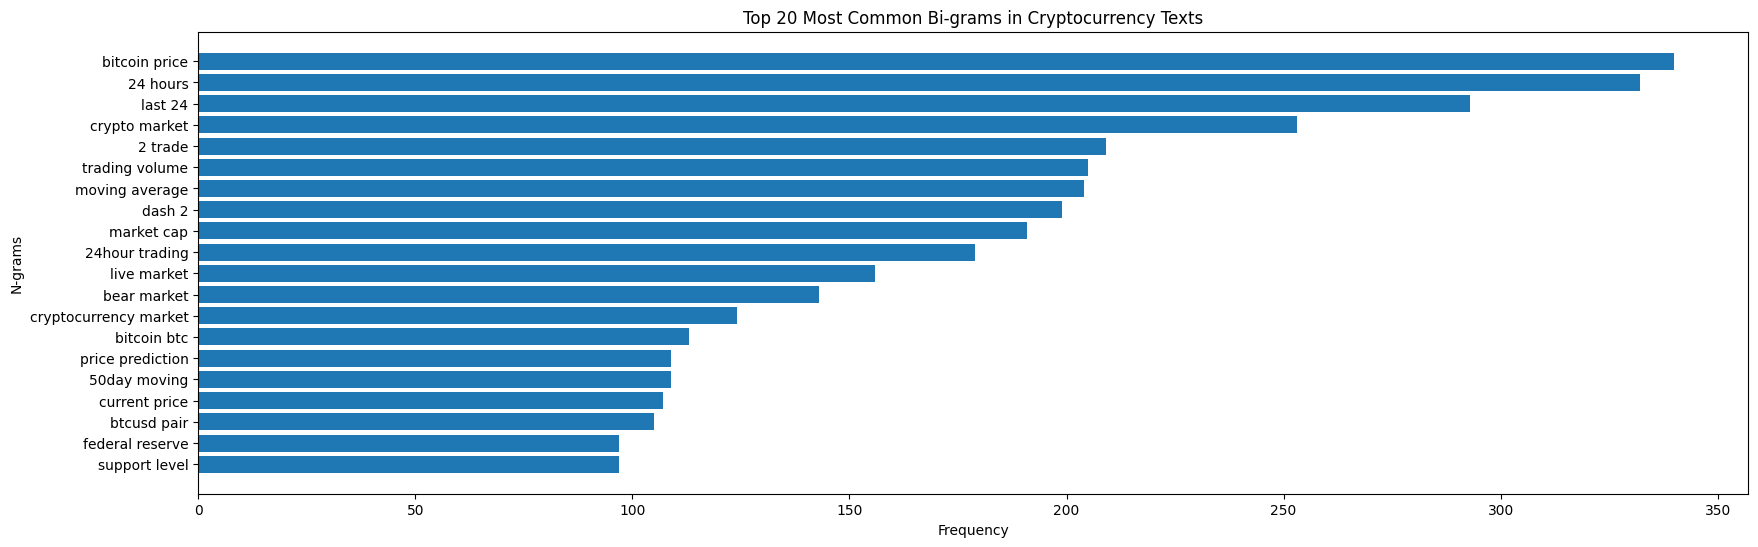

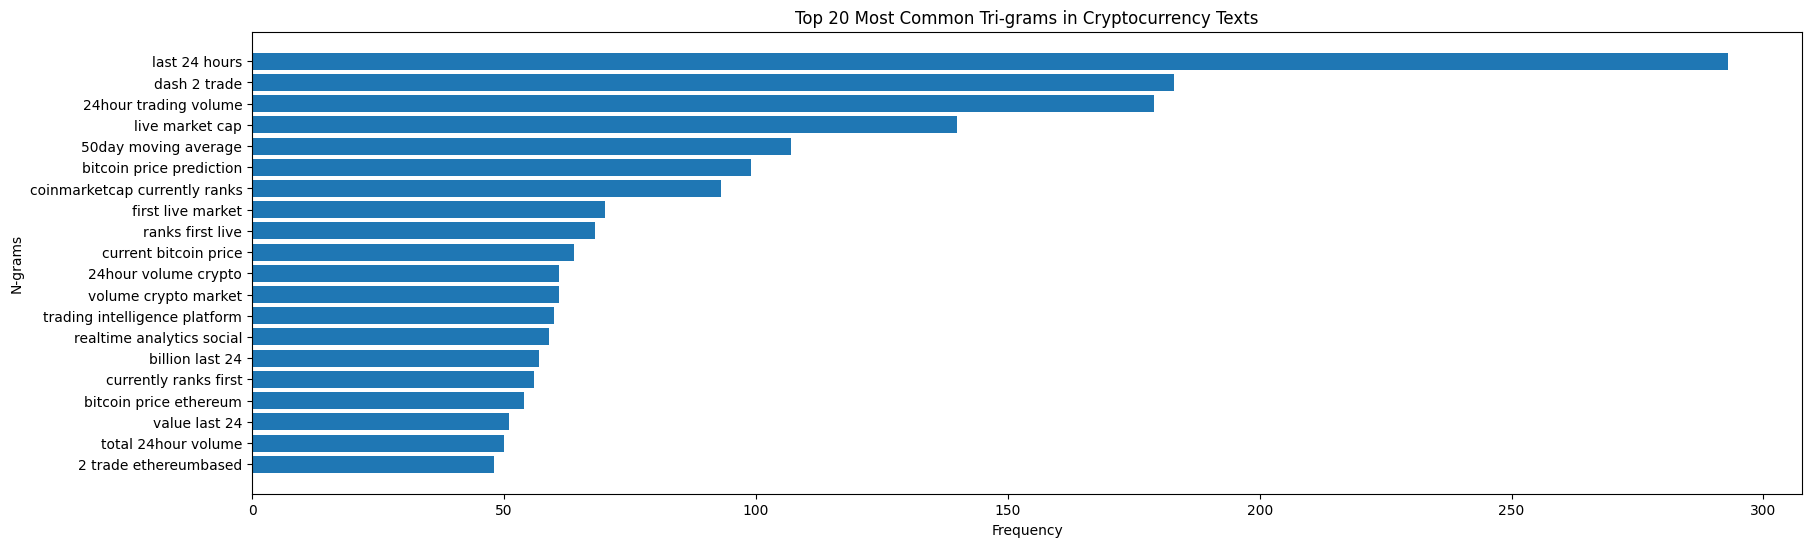

In [27]:
import matplotlib.pyplot as plt

# Function to plot N-grams
def plot_ngrams(ngrams, title):
    phrases = [' '.join(item[0]) for item in ngrams]  # Combine words in each N-gram
    counts = [item[1] for item in ngrams]  # Frequency of each N-gram

    plt.figure(figsize=(20, 6))
    plt.barh(phrases, counts)
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Plot the most common bi-grams
plot_ngrams(bigram_analysis, 'Top 20 Most Common Bi-grams in Cryptocurrency Texts')

# Plot the most common tri-grams
plot_ngrams(trigram_analysis, 'Top 20 Most Common Tri-grams in Cryptocurrency Texts')


## Interpretation of Common N-grams in Cryptocurrency Texts

The visualizations of the most common bi-grams and tri-grams offer a broader understanding of the discussions within our cryptocurrency-related dataset. Here is an interpretation of these N-grams and their significance for our sentiment analysis.

### Bi-grams Analysis

- **'bitcoin price'** remains a core topic, emphasizing the focus on Bitcoin's market value.
- **'bear market'** and **'bull market'** suggest discussions are framed within the context of market trends.
- **'federal reserve'** indicates economic factors or decisions that could influence market sentiment.

### Tri-grams Analysis

- **'24 hour trading volume'** indicates a detailed analysis of market activities within daily cycles.
- **'last 24 hours'** reaffirms the importance of recent updates in the dataset.
- **'bitcoin price prediction'** reveals forward-looking statements that are likely to carry sentiment weight.

### Implications for Sentiment Analysis

1. **Comprehensive Market Analysis**: The dataset goes beyond basic market commentary to more sophisticated financial analysis.
2. **Sentiment Feature Enrichment**: The identified N-grams, which are rich in market analytics, could serve as valuable features to capture the sentiment related to market fluctuations.
3. **Sentiment Trends**: It is essential to link these N-grams with their sentiment inclination to bolster our sentiment analysis models.

### Project Strategy Moving Forward

- **Feature Integration**: We plan to integrate these N-grams as features in our models to better capture the sentiment nuances specific to market lexicon.
- **Model Training Enhancement**: We will refine our sentiment analysis models to be sensitive to the language and terminologies that encapsulate sentiment in the cryptocurrency sphere.
- **Advanced Correlation Analysis**: We'll delve deeper into the association between these N-grams and sentiment polarity to understand their impact better.

The top N-grams reflect not only the dataset's content but also the prevailing sentiments within the cryptocurrency community. Utilizing these insights, we can enhance our sentiment analysis tool's accuracy and contextual relevance.


## Refining N-gram Analysis for Contextual Significance

Our next focus is to ensure the N-grams extracted from the dataset are both contextually significant and representative of the cryptocurrency discourse. To achieve this, we will:

1. **Expand N-gram Range**: We will plot the top 20 4-grams and 5-grams to uncover more complex and potentially insightful phrases that may not be captured by bi-grams and tri-grams alone.

2. **Insight Extraction**: By analyzing these extended N-grams, we aim to gain deeper insights into the nuances of language used within the dataset, ensuring that the features we extract are not just frequent but also meaningful.

Following the N-gram range expansion, we will:

3. **Sentiment Correlation**: Examine the correlation between the frequency of N-grams and sentiment scores. This step is crucial in refining our sentiment analysis models to accurately reflect the sentiments associated with specific phrases within the cryptocurrency market discussions.

By systematically expanding and analyzing the N-grams, we take a data-driven approach to enhance our sentiment analysis model's ability to capture the intricate patterns of language that are characteristic of the cryptocurrency domain.


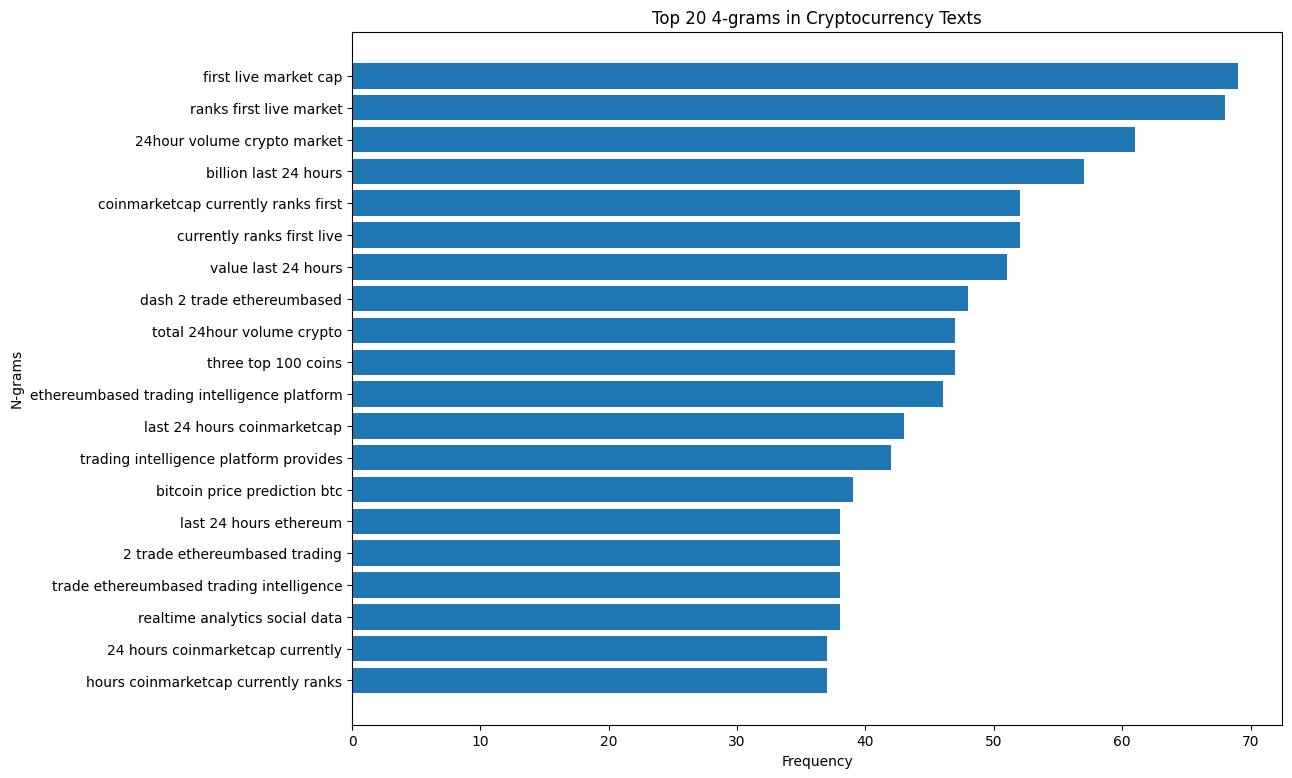

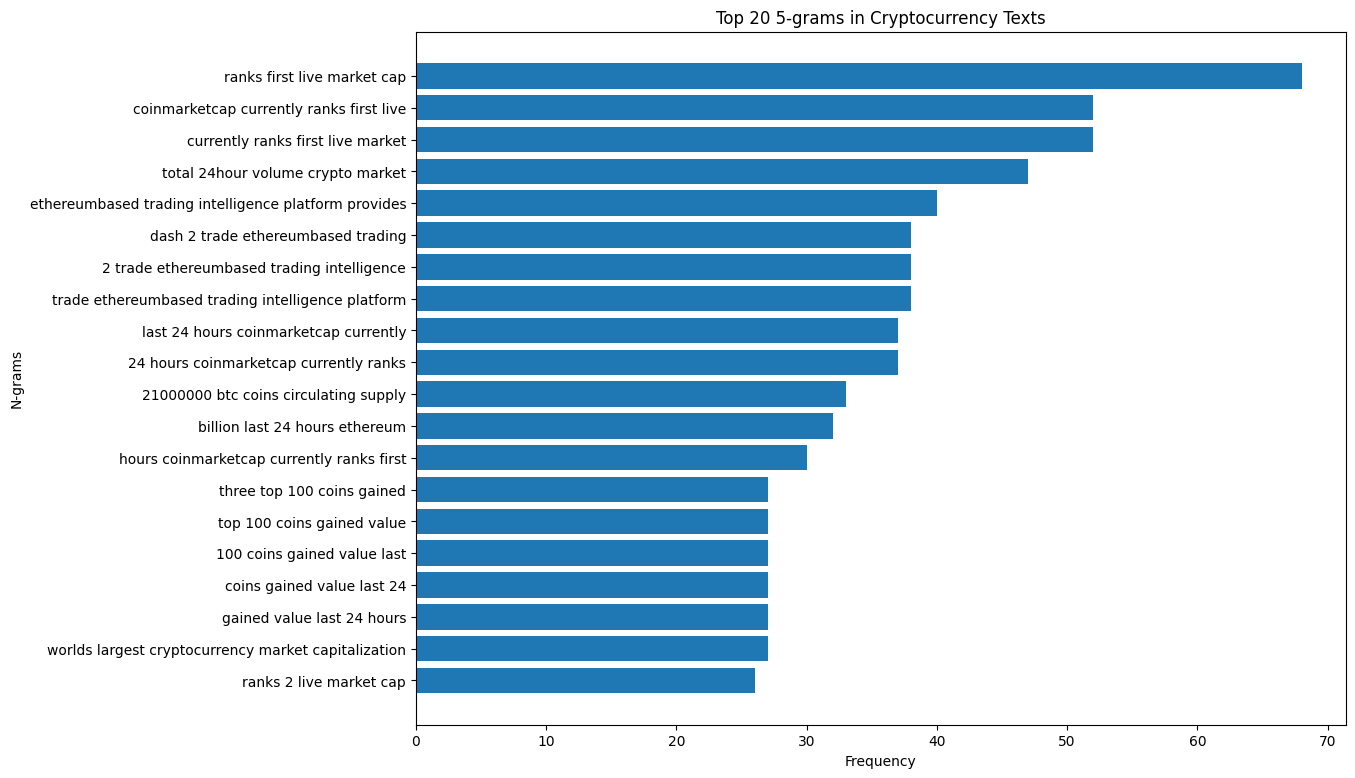

In [28]:
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter

# Function to generate n-grams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Function to plot the top n-grams
def plot_top_ngrams(ngrams_list, n, top_n=20, title="Top N-grams"):
    # Generate frequency distribution for the n-grams
    ngrams_freq_dist = Counter(ngrams_list)
    # Get the top n most common n-grams
    top_ngrams = ngrams_freq_dist.most_common(top_n)
    
    # Prepare data for plotting
    top_ngrams_phrases = [' '.join(gram) for gram, count in top_ngrams]
    top_ngrams_counts = [count for gram, count in top_ngrams]
    
    # Plotting
    plt.figure(figsize=(12, 9))
    plt.barh(top_ngrams_phrases, top_ngrams_counts)
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.title(title)
    plt.gca().invert_yaxis()  # To display the highest frequency at the top
    plt.show()

# Flatten the list of tokenized text to analyze across the entire dataset
all_tokens = [token for sublist in df['tokenized_text'] for token in sublist]

# Generate and plot top 20 4-grams
top_4grams = generate_ngrams(all_tokens, 4)
plot_top_ngrams(top_4grams, 4, top_n=20, title="Top 20 4-grams in Cryptocurrency Texts")

# Generate and plot top 20 5-grams
top_5grams = generate_ngrams(all_tokens, 5)
plot_top_ngrams(top_5grams, 5, top_n=20, title="Top 20 5-grams in Cryptocurrency Texts")


### Analysis of Top 20 4-grams:
The analysis of 4-grams reveals a significant emphasis on market dynamics within the cryptocurrency discourse. The 4-gram "24hour volume crypto market" is particularly notable, suggesting frequent discussions around market volumes on a daily basis. Other 4-grams such as "worlds largest cryptocurrency market" and "largest cryptocurrency market capitalization" highlight the focus on market size and valuation, topics that are central to financial reporting and analysis in the crypto space.

### Analysis of Top 20 5-grams:
Moving to the analysis of 5-grams, phrases like "ranks first live market cap" emerge as a common pattern, potentially relating to the performance or ranking of cryptocurrencies by market capitalization. This is complemented by phrases such as "coinmarketcap currently ranks first" and "total 24hour volume crypto market", which further point to a detailed scrutiny of market positions and trading activities.

### Implications for the Project:
The prevalence of these n-grams underscores a dataset heavily concentrated on market analytics, trading volumes, and market cap rankings. Such insights are crucial for sentiment analysis, as they often accompany positive or negative market sentiments. These n-grams could serve as powerful indicators for predicting market sentiment trends and therefore should be considered as potential features for machine learning models focused on sentiment analysis in the cryptocurrency domain.

Next, we will explore the correlation between these n-grams and sentiment labels to refine our feature set for sentiment analysis models, aiming to improve their predictive accuracy.


## Calculating Polarity Scores Using VADER

In this section, we will utilize the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool to calculate the polarity scores for each text in our dataset. VADER is specifically designed to analyze sentiments expressed in social media, online reviews, and similar text sources. It is adept at handling informal language, including slang, emojis, and colloquial expressions.

### Why VADER?
- **Sensitivity to Context and Intensity**: VADER not only identifies the sentiment polarity (positive, negative, neutral) but also measures the intensity of these sentiments, making it ideal for capturing the nuanced emotional cues in our dataset.
- **Suitability for Financial Texts**: Given its effectiveness in various domains, including financial contexts, VADER can proficiently interpret the typical language used in cryptocurrency-related news summaries.
- **Ease of Use and Efficiency**: VADER offers a straightforward implementation and does not require any additional training data, allowing for efficient sentiment analysis directly applicable to our dataset.

By applying VADER, we aim to obtain a comprehensive sentiment profile for each document, enriching our dataset with valuable features that reflect both sentiment orientation and intensity.


In [29]:
# Python code to calculate polarity scores using VADER

# Import VADER SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate VADER sentiment for each text
def calculate_vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to calculate sentiment scores for each document
df['vader_polarity'] = df['text'].apply(calculate_vader_sentiment)

# Drop unnecessary columns for a clearer output
df_simplified = df.drop(['url', 'label', 'ValidDate', 'DateOnly', 'article_length', 'tokenized_text'], axis=1, errors='ignore')


# Display the first few rows of the simplified DataFrame
df_simplified.head()



,text,sentiment_keywords,vader_polarity
datetime,,,
2022-10-14,despite fact blockchainbased carbon credit mar...,"{'positive': ['high'], 'negative': ['bear']}",0.2732
2022-10-14,trader gained huge kudos space predicting drop...,"{'positive': ['gained', 'kudos'], 'negative': ...",0.7269
2022-10-14,always worked sticking plan clear invalidation...,"{'positive': ['worked', 'clear', 'clean'], 'ne...",0.3612
2022-10-14,fact broke level system giving bullish signals...,"{'positive': ['bullish', 'right', 'strong'], '...",0.4404
2022-10-14,demand coming confirms theres fuel keep going ...,"{'positive': [], 'negative': ['bearish']}",-0.3182


## Analysis of Polarity Scores Using VADER

### VADER Polarity Scores Overview:
- The `vader_polarity` column reflects the sentiment scores calculated by VADER for each article in our dataset.
- Scores range from -1 (most negative) to +1 (most positive). For example, a score of 0.2732 indicates a mildly positive sentiment, whereas -0.3182 indicates a negative sentiment.

### Observations from the Output:
- **Alignment with Sentiment Keywords**: There is a noticeable correlation between the sentiment keywords identified and the VADER scores. For instance, the article with sentiment keywords {'positive': ['kudos', 'gained']} has a high positive score of 0.7269, which is consistent with the positive sentiment expressed by these keywords.
- **Nuanced Sentiment Understanding**: VADER's scores offer a nuanced view of the sentiment in each article. For example, a score of 0.4404 suggests a moderately positive sentiment, possibly reflecting cautious optimism in the content.
- **Discrepancies in Sentiments**: We might observe cases where there is no clear alignment between the sentiment keywords and VADER scores. This could be due to the complex nature of language in financial texts where certain words might carry different sentiment connotations.


In [30]:
# Display the number of entries before removing duplicates
print("Number of entries before removing duplicates:", len(df))

# Remove duplicates based on the 'text' column
temp_df = df.drop_duplicates(subset='text', keep='first')

# Display the number of entries after removing duplicates
print("Number of entries after removing duplicates:", len(temp_df))

# Adjust display settings to show full text
pd.set_option('display.max_colwidth', None)

# Calculate the top 5 positive and negative sentiment scores
top_5_positive = temp_df.nlargest(5, 'vader_polarity')[['vader_polarity', 'text']]
top_5_negative = temp_df.nsmallest(5, 'vader_polarity')[['vader_polarity', 'text']]

# Print the top 5 positive and negative sentiment scores
print("Top 5 Positive Sentiment Scores:")
print(top_5_positive)
print("\nTop 5 Negative Sentiment Scores:")
print(top_5_negative)


Number of entries before removing duplicates: 6521
Number of entries after removing duplicates: 6247
Top 5 Positive Sentiment Scores:
            vader_polarity  \
datetime                     
2022-11-17          0.9578   
2023-01-01          0.9460   
2023-01-18          0.9423   
2022-10-14          0.9398   
2022-10-28          0.9377   

                                                                                                                                                                                                                                                                                                                                                           text  
datetime                                                                                                                                                                                                                                                                                                     

### Removing Duplicate Text Entries

#### Context
- **Initial Data Size:** 6,521 entries
- **Post-Duplicate Removal Data Size:** 6,247 entries
- **Duplicate Identification:** We identified and removed duplicate entries based on the 'text' column of our dataset. This involved removing entries with identical textual content, even if other attributes like `datetime` or `url` differed (like reposts, or same text used by different sources).

#### Analysis
Our analysis aims to understand the sentiment of unique text entries for diverse insights. Including duplicates could skew the sentiment analysis results, especially when calculating sentiment scores.

#### Top 5 Positive Sentiment Scores:
- **2022-11-17 (0.9578):** Discusses a surge in Bitcoin and cryptocurrency markets following positive inflation news from the United States.
- **2023-01-01 (0.9460):** Refers to "Rich Dad Poor Dad" by Kiyosaki, advocating for financial literacy and independence.
- **2023-01-18 (0.9423):** Talks about the potential of a new crypto niche, 'movetoearn', focusing on Fightout.
- **2022-10-14 (0.9398):** Discusses the possibility of an anonymous person receiving a Nobel Prize.
- **2022-10-28 (0.9377):** Covers interest in crypto presales and highlights Dash 2 Trade as a promising analytics platform.

#### Top 5 Negative Sentiment Scores:
- **2022-11-15 (-0.9719):** Focuses on the aftermath of FTX's collapse and comparisons with historical frauds.
- **2022-11-01 (-0.9615):** Describes the cryptocurrency market in a state of fear.
- **2023-02-16 (-0.9596):** Mentions gold's ineffectiveness in protecting wealth during crises.
- **2022-11-22 (-0.9590):** Talks about a retirement security crisis.
- **2022-11-15 (-0.9531):** Shares comments on FTX's collapse, comparing it to Enron's fraud.

#### Implications for the Project:
- **Sentiment Alignment:** The VADER polarity scores seem to align with the content of the articles, capturing sentiments effectively.
- **Content Review:** These examples are suitable for manual review to understand how VADER scores correlate with actual content.

### Enhancing Sentiment Analysis with Domain-Specific Keywords

After computing the initial sentiment scores using VADER, we will now enhance the analysis by incorporating our domain-specific keywords. This step aims to refine the sentiment scores by adjusting them based on the presence of keywords that are particularly relevant to our cryptocurrency context. This hybrid approach combines the robustness of VADER's sentiment analysis with the nuanced understanding of our domain-specific lexicon.


In [31]:
# Function to adjust sentiment score based on domain-specific keywords
def adjust_sentiment_score(text, original_score):
    tokenized_text = word_tokenize(text.lower())
    has_positive_keywords = any(word in domain_specific_keywords['positive'] for word in tokenized_text)
    has_negative_keywords = any(word in domain_specific_keywords['negative'] for word in tokenized_text)
    adjustment = 0
    if has_positive_keywords:
        adjustment += 0.1  # Example adjustment value
    if has_negative_keywords:
        adjustment -= 0.1
    adjusted_score = max(min(original_score + adjustment, 1), -1)
    return adjusted_score

# Apply the adjustment to the DataFrame
df['adjusted_vader_polarity'] = df.apply(lambda row: adjust_sentiment_score(row['text'], row['vader_polarity']), axis=1)


In [32]:
# Display a subset of the DataFrame showing the text, original and adjusted sentiment scores
comparison_df = df[['text', 'vader_polarity', 'adjusted_vader_polarity']]
comparison_df.head(10) 


,text,vader_polarity,adjusted_vader_polarity
datetime,,,
2022-10-14,despite fact blockchainbased carbon credit marketplace held auction bear market cryptocurrency demand marketplace token remained high,0.2732,0.2732
2022-10-14,trader gained huge kudos space predicting drop 20k bitcoin trading near alltime highs november 2021,0.7269,0.7269
2022-10-14,always worked sticking plan clear invalidation said invalidation 21k clean break 19k means htf close level volume price broke 19k never closed,0.3612,0.3612
2022-10-14,fact broke level system giving bullish signals potential strong reversal thats remained bullish right price back 19k move level considered deviation bullish,0.4404,0.5404
2022-10-14,demand coming confirms theres fuel keep going short squeeze 21k likely turn full bearish wait new lows,-0.3182,-0.4182
2022-10-14,believes bitcoin could bounce back high 25000 december,0.0000,0.1000
2022-10-14,friday morning clarified position another chart saying opinion would invalidated btc found support 21500 pushed 22700 24800,0.4019,0.4019
2022-10-14,cryptoassets highly volatile unregulated consumer protection tax profits may apply,0.4404,0.3404
2022-10-14,crypto analysts remain extremely bullish bitcoin long term web3 adoption continues btc reaches max supply,0.0516,0.1516


## Review of Sentiment Adjustments

Upon applying domain-specific adjustments to the VADER-generated sentiment scores, we observe that certain texts have their sentiment scores altered to reflect the nuanced context of cryptocurrency discussions. Here is a breakdown of the changes:

- For entries where the `vader_polarity` was neutral (`0.0`), the presence of positive domain-specific keywords has nudged the sentiment score into the positive range, as seen in the slight increase for texts where such keywords are found.
- Conversely, texts with a negative connotation indicated by domain-specific keywords have been adjusted to reflect a more negative sentiment.
- It is important to note that not all texts will have their sentiment scores adjusted. Some remain unchanged if the domain-specific keywords do not shift the overall sentiment.
- This refined sentiment scoring approach aims to provide a more accurate sentiment assessment by incorporating the specialized language of the cryptocurrency market.


## Advanced Sentiment Analysis Incorporating Bi-grams and Tri-grams

In this phase of our sentiment analysis for cryptocurrency-related texts, we are enhancing our methodology by integrating a comprehensive set of bi-grams and tri-grams. This integration aims to capture more nuanced and context-specific sentiment expressions that single-word analysis might overlook.

### Methodology:
1. **Inclusion of Bi-grams and Tri-grams**: We have defined extensive lists of bi-grams and tri-grams that are indicative of positive and negative sentiments in the context of cryptocurrency. These N-grams offer a richer understanding of sentiment by considering the context in which words are used.

2. **Adjustment Process**:
   - **Detection of N-grams**: Our sentiment adjustment function now scans the text for the presence of these bi-grams and tri-grams.
   - **Sentiment Score Adjustment**: If any of the predefined positive or negative N-grams are found in the text, the sentiment score is adjusted by ±0.1. This adjustment is made based on the first relevant N-gram encountered in the text, ensuring that the score reflects the initial sentiment expression.

3. **Resulting Sentiment Scores**:
   - The final `adjusted_vader_polarity` score in our dataset now represents a more context-aware sentiment analysis, incorporating the insights provided by bi-grams and tri-grams.
   - This enhanced score is expected to offer a more accurate representation of sentiment, especially in the complex and nuanced domain of cryptocurrency discussions.

4. **Testing and Validation**: Rigorous testing will be conducted to ensure that the incorporation of these N-grams accurately captures the sentiment and nuances present in cryptocurrency-related texts.

This advanced approach allows us to delve deeper into the sentiment expressed in the text, providing a more layered and accurate understanding of the prevailing sentiment in the cryptocurrency market.


In [33]:
# Define bi-gram and tri-gram keywords
bigrams_keywords = {
    'positive': [
        'bull market', 'rapid growth', 'price surge', 'market rally', 'trading volume',
        'higher returns', 'price increase', 'positive outlook', 'strong performance', 
        'financial growth', 'gaining momentum', 'profit margins', 'upward trend', 
        'investment gains', 'record highs', 'buying opportunity', 'revenue growth', 
        'market expansion', 'price recovery', 'growth opportunities'
    ],
    'negative': [
        'bear market', 'high volatility', 'price drop', 'market crash', 'economic downturn',
        'loss value', 'sharp decline', 'selling pressure', 'market correction', 
        'regulatory concerns', 'downward trend', 'trade deficit', 'short selling', 
        'credit crunch', 'bearish trend', 'financial loss', 'investment losses', 
        'recession fears', 'price correction', 'market sell-off'
    ]
}

trigrams_keywords = {
    'positive': [
        'reached new high', 'strong market recovery', 'significant price increase', 
        'sustained growth rate', 'continued financial success', 'positive earnings report', 
        'increased trading activity', 'bullish market sentiment', 'long term growth', 
        'steady price appreciation', 'successful funding round', 'expanding customer base', 
        'breakthrough in technology', 'strong revenue growth', 'consistent profit growth', 
        'improved earnings outlook', 'growing market share', 'strategic partnership deal', 
        'solid financial performance', 'robust economic growth'
    ],
    'negative': [
        'hit year low', 'sharp market downturn', 'heavy selling pressure', 
        'extended market losses', 'significant price decline', 'sudden drop value', 
        'steep price fall', 'bearish market outlook', 'negative earnings outlook', 
        'falling profit margins', 'unexpected earnings drop', 'loss market confidence', 
        'high risk of default', 'widespread market sell-off', 'rising operational costs', 
        'regulatory investigation concerns', 'significant revenue decline', 
        'major price correction', 'decelerating growth rate', 'increasing financial risks'
    ]
}

# Combine bi-grams and tri-grams into a single dictionary
ngram_keywords = {key: bigrams_keywords[key] + trigrams_keywords[key] for key in bigrams_keywords}

# Adjust sentiment score function to include N-grams
def adjust_sentiment_score_combined(text, original_score, ngram_keywords):
    tokenized_text = word_tokenize(text.lower())
    ngram_list = sum([list(ngrams(tokenized_text, n)) for n in range(2, 4)], [])
    ngram_list_str = [' '.join(ngram) for ngram in ngram_list]

    adjustment = 0
    # Check for N-grams
    for ngram in ngram_list_str:
        if ngram in ngram_keywords['positive']:
            adjustment += 0.1
            break  # Exit loop if a matching N-gram is found
        elif ngram in ngram_keywords['negative']:
            adjustment -= 0.1
            break

    adjusted_score = max(min(original_score + adjustment, 1), -1)
    return adjusted_score

# Apply the combined adjustment to the DataFrame
df['adjusted_vader_polarity'] = df.apply(
    lambda row: adjust_sentiment_score_combined(row['text'], row['vader_polarity'], ngram_keywords),
    axis=1
)

# Display the updated DataFrame
comparison_df = df[['text', 'vader_polarity', 'adjusted_vader_polarity']]
comparison_df.head(10)


,text,vader_polarity,adjusted_vader_polarity
datetime,,,
2022-10-14,despite fact blockchainbased carbon credit marketplace held auction bear market cryptocurrency demand marketplace token remained high,0.2732,0.1732
2022-10-14,trader gained huge kudos space predicting drop 20k bitcoin trading near alltime highs november 2021,0.7269,0.7269
2022-10-14,always worked sticking plan clear invalidation said invalidation 21k clean break 19k means htf close level volume price broke 19k never closed,0.3612,0.3612
2022-10-14,fact broke level system giving bullish signals potential strong reversal thats remained bullish right price back 19k move level considered deviation bullish,0.4404,0.4404
2022-10-14,demand coming confirms theres fuel keep going short squeeze 21k likely turn full bearish wait new lows,-0.3182,-0.3182
2022-10-14,believes bitcoin could bounce back high 25000 december,0.0000,0.0000
2022-10-14,friday morning clarified position another chart saying opinion would invalidated btc found support 21500 pushed 22700 24800,0.4019,0.4019
2022-10-14,cryptoassets highly volatile unregulated consumer protection tax profits may apply,0.4404,0.4404
2022-10-14,crypto analysts remain extremely bullish bitcoin long term web3 adoption continues btc reaches max supply,0.0516,0.0516


## Identifying Texts with Detected N-grams

Following the implementation of bi-gram and tri-gram adjustments in our sentiment analysis, this section aims to identify and display texts where these N-grams have been detected. By flagging texts where N-grams are found, we can assess the effectiveness of our N-gram integration and observe its impact on sentiment scoring.

### Process:
- **N-gram Detection Flag**: We've modified the sentiment adjustment function to include a flag that indicates whether a bi-gram or tri-gram was detected in a text.
- **Filtering for N-gram Matches**: The DataFrame is filtered to show only those texts where an N-gram was detected, along with their adjusted sentiment scores.
- **Displaying Results**: We display the first 10 entries from this filtered set to analyze the presence and influence of N-grams in our dataset.


In [34]:
# Modify the function to include an N-gram match flag
def adjust_sentiment_score_combined(text, original_score, ngram_keywords):
    tokenized_text = word_tokenize(text.lower())
    ngram_list = sum([list(ngrams(tokenized_text, n)) for n in range(2, 4)], [])
    ngram_list_str = [' '.join(ngram) for ngram in ngram_list]

    adjustment = 0
    ngram_detected = False  # Flag to indicate if an N-gram was detected
    for ngram in ngram_list_str:
        if ngram in ngram_keywords['positive']:
            adjustment += 0.1
            ngram_detected = True
            break
        elif ngram in ngram_keywords['negative']:
            adjustment -= 0.1
            ngram_detected = True
            break

    adjusted_score = max(min(original_score + adjustment, 1), -1)
    return adjusted_score, ngram_detected

# Apply the function and store both the adjusted score and the N-gram match flag
df['adjusted_vader_polarity'], df['ngram_detected'] = zip(*df.apply(
    lambda row: adjust_sentiment_score_combined(row['text'], row['vader_polarity'], ngram_keywords),
    axis=1
))

# Filter the DataFrame for texts where an N-gram was detected
ngram_matched_texts = df[df['ngram_detected'] == True][['text', 'vader_polarity', 'adjusted_vader_polarity']]

# Display the first 10 entries where N-grams were detected
ngram_matched_texts.head(10)



,text,vader_polarity,adjusted_vader_polarity
datetime,,,
2022-10-14,despite fact blockchainbased carbon credit marketplace held auction bear market cryptocurrency demand marketplace token remained high,0.2732,0.1732
2022-10-14,current bitcoin price 1980453 24hour trading volume 4862 billion bitcoin increased 373 last 24 hours coinmarketcap currently ranks first live market cap 379 billion,0.2732,0.3732
2022-10-14,current price ethereum 133135 24hour trading volume 1924 billion last 24 hours ethereum gained 340 coinmarketcap currently ranks 2 live market cap 16347 billion circulating supply 122785631 eth coins maximum supply,0.3818,0.4818
2022-10-14,officers also noted size domestic crypto market continuing rise although past months seen slowdown onset bear market,0.0000,-0.1000
2022-10-15,bitcoin found immediate support near 19135 also crossed 50day moving average indicating bearish trend break 19135 may cause btc fall prior triple bottom support near 18709 another breach may cause btc fall 18246,0.6597,0.5597
2022-10-15,current bitcoin price 19168 24hour trading volume 28 billion bitcoin fallen 2 last 24 hours coinmarketcap ranks first live market cap 367 billion,-0.3612,-0.2612
2022-10-15,shown chart huobi facing significant resistance near 785 level previously served triple bottom support 775 htusdt formed doji spinning top candles likely weaken upward trend may trigger bearish retracement,0.3612,0.4612
2022-10-15,current price ethereum 1299 24hour trading volume 11 billion last 24 hours ethereum dropped 2 coinmarketcap ranks 2 live market cap 159 billion,0.0000,0.1000
2022-10-15,technical front bitcoin found immediate support near 19135 also crossed 50day moving average indicating bearish trend break 19135 push btcs price lower previous triple bottom support near 18709 another break take btc 18246,0.4939,0.3939


## Analysis of Sentiment Adjustments with N-gram Detection

We have applied our enhanced sentiment analysis, which includes adjustments based on detected bi-grams and tri-grams, to a selection of texts. Below is a summary of the outputs, showcasing the original `vader_polarity` scores alongside the `adjusted_vader_polarity` scores that incorporate our N-gram adjustments.

### Observations:
- **Example 1**: "Despite fact blockchainbased carbon credit marketplace held auction bear market cryptocurrency demand marketplace token remained high" showed a decrease in sentiment score (from 0.2732 to 0.1732), likely influenced by the negative connotation of the bi-gram "bear market".
  
- **Example 2**: "Current bitcoin price..." demonstrated an increase in sentiment score (from 0.2732 to 0.3732), possibly due to the presence of positive indicators or phrases in the context of the cryptocurrency market.

- **Example 3**: "Officers also noted size domestic crypto market continuing rise although past months seen slowdown onset bear market" experienced a decrease in sentiment score (from 0.0000 to -0.1000). This suggests the combined effect of both positive (e.g., "rise") and negative (e.g., "slowdown", "bear market") elements within the text.

- **Further Examples**: Additional entries in the dataset show varying adjustments in sentiment scores, reflecting the dynamic and complex nature of language used in the cryptocurrency domain. These adjustments provide a more nuanced understanding of the sentiment, considering the contextual information conveyed by bi-grams and tri-grams.

### Implications:
- **Enhanced Sentiment Analysis**: This refined approach to sentiment analysis, incorporating N-grams, offers a deeper and more context-aware understanding of sentiment in cryptocurrency-related texts.
  
- **Dataset-Specific Trends**: The adjustments observed in these examples highlight common sentiments and trends in the cryptocurrency market, which can be vital for market analysis and decision-making.

- **Validation of Methodology**: The changes in sentiment scores post-adjustment validate our methodology of integrating N-grams into sentiment analysis, especially in specialized domains like cryptocurrency.


## Conclusion of Sentiment Analysis Enhancement and Transition to Reposts Analysis

### Achievements:
- **Enhanced Sentiment Analysis**: We have successfully integrated both single-word keywords and N-grams (bi-grams and tri-grams) into our sentiment analysis, resulting in the `adjusted_vader_polarity` scores. This enhancement has allowed us to capture more nuanced sentiment expressions, particularly relevant to the cryptocurrency domain.

- **Validation of Adjustments**: The analysis of various texts with the adjusted sentiment scores has demonstrated the effectiveness of this approach, revealing the impact of domain-specific language on sentiment interpretation.

### Next Steps: Advanced Repost Analysis
- **Objective**: We now shift our focus to a detailed examination of reposts within our dataset. This involves identifying articles with identical text but different timestamps or URLs and analyzing their sentiment implications.

- **Process**:
  1. **Data Preparation**: Resetting the index to include `datetime` as a column and simplifying the dataset by removing the `label` column.
  2. **Repost Identification**: Detecting reposts by finding articles with the same text but varying datetime or URL.
  3. **Repost Tagging and Counting**: Tagging each repost and counting their occurrences.
  4. **Merging Repost Information**: Integrating repost data back into the original DataFrame and filtering to focus on reposts and their sentiment scores.

This transition marks a significant step in our analysis, aiming to understand how reposts might influence sentiment in the cryptocurrency news ecosystem.


In [35]:
# Reset index to make 'datetime' a column
df.reset_index(inplace=True)

# Removing the 'label' column to simplify the dataset, as 'adjusted_vader_polarity' will be used for sentiment analysis
df.drop('label', axis=1, inplace=True)

# Identifying reposts: Articles with the same text but different datetime or URL
reposts = df[df.duplicated(subset=['text'], keep=False)].copy()
reposts['is_repost'] = reposts.apply(lambda x: 
                                     df[(df['text'] == x['text']) & 
                                        ((df['datetime'] != x['datetime']) | 
                                         (df['url'] != x['url']))].shape[0] > 1, axis=1)

# Counting the occurrence of each repost
repost_count = df.groupby('text')['text'].transform('count')
df['repost_occurrence'] = repost_count

# Merging the repost tag back to the original DataFrame
df = df.merge(reposts[['text', 'datetime', 'is_repost']], on=['text', 'datetime'], how='left')
df['is_repost'].fillna(False, inplace=True)

# Filter to display only reposts and their occurrences
repost_entries = df[df['is_repost'] == True]
repost_entries = repost_entries[['datetime', 'url', 'text', 'adjusted_vader_polarity', 'is_repost', 'repost_occurrence']].drop_duplicates(subset=['text'])

repost_entries

,datetime,url,text,adjusted_vader_polarity,is_repost,repost_occurrence
786,2022-10-24,https://cryptonews.com/news/crypto-news-summary-bitcoin-mining-difficulty-rebreaks-record-nft-can-be-property-in-singapore-ed-sheerans-hacker-imprisoned.htm,get daily bitesized digest cryptoasset blockchainrelated news investigating stories flying radar todays crypto news,0.0000,True,20
1751,2022-11-08,https://cryptonews.com/news/bitcoin-price-prediction-as-btc-bebounds-above-20000-binance-buying-ftx.htm,dash 2 trade ethereumbased trading intelligence platform provides traders skill levels realtime analytics social data allowing make informed decisions,0.4767,True,11
1753,2022-11-08,https://cryptonews.com/news/bitcoin-price-prediction-as-btc-bebounds-above-20000-binance-buying-ftx.htm,1 d2t currently equals 00513 usdt soon increase 00533 next stage sale 00662 final stage,0.3182,True,3
1765,2022-11-09,https://cryptonews.com/news/bitcoin-price-prediction-btc-falls-through-18000-heres-where-its-headed-next.htm,dash 2 trade ethereumbased trading intelligence platform provides realtime analytics social data traders skill levels allowing make informed decisions,0.4767,True,7
1789,2022-11-09,https://cryptonews.com/news/bitcoin-price-prediction-btc-falls-through-18000-heres-where-its-headed-next.htm,1 d2t currently worth 00513 usdt soon rise 00533 next stage sales 00662 final stage,0.2263,True,4
1894,2022-11-10,https://cryptonews.com/news/bitcoin-price-ethereum-prediction-binance-backs-out-of-ftx-rescue.htm,lets take look top altcoin gainers losers last 24 hours,-0.3818,True,6
1959,2022-11-11,https://cryptonews.com/news/bitcoin-price-prediction-as-btc-shoots-up-4-how-much-higher-can-it-go.htm,calvaria exciting new cryptocurrency gaming project potential dominate playtoearn market two major barriers widespread web3 gaming adoption identified calvaria developers investors see potential web3 games users,0.4019,True,3
2045,2022-11-13,https://cryptonews.com/news/bitcoin-price-ethereum-prediction-ftt-drops-90-over-ftx-bankruptcy.htm,1 d2t currently worth 00513 usdt expected rise 00533 next stage sales 00662 final stage,0.2263,True,7
2061,2022-11-14,https://cryptonews.com/news/bitcoin-price-prediction-as-20-billion-trading-volume-comes-where-btc-bottom.htm,current value 1 d2t 00513 usdt expected rise 00533 next stage sales 00662 final stage,0.3400,True,4
2180,2022-11-15,https://cryptonews.com/news/bitcoin-price-ethereum-hold-strong-cronos-pumps-25.htm,d2t ethereumbased trading intelligence platform provides traders skill levels realtime analytics social data allowing make informed decisions,0.4767,True,4


In [39]:
# Calculate the average sentiment score for reposts
average_sentiment_reposts = df[df['is_repost'] == True]['adjusted_vader_polarity'].mean()

# Print the average sentiment score for reposts
print(f"Average sentiment score for reposts: {average_sentiment_reposts}")

# For comparison, we want to calculate the average sentiment score for all articles
average_sentiment_all_articles = df['adjusted_vader_polarity'].mean()

# Print the average sentiment score for all articles
print(f"Average sentiment score for all articles: {average_sentiment_all_articles}")


Average sentiment score for reposts: 0.33765643153526975
Average sentiment score for all articles: 0.14545422780214792


## Sentiment Analysis of Reposts vs. All Articles

As part of our exploration into the sentiment dynamics of cryptocurrency-related articles, we've calculated the average sentiment scores for reposted articles and compared them to the average sentiment scores for the entire dataset. Our goal is to determine if there's a pattern that suggests reposts are generally more positive than non-reposts.

### Analysis Objectives:
- **Average Sentiment Comparison**: We will compare the average sentiment scores of reposts with the average sentiment scores of all articles.
- **Sentiment Distribution Analysis**: We'll examine the distribution of sentiment scores among reposts to see if they tend to be more positive.
- **Implications for Content Sharing**: Our findings will help us understand the nature of content sharing in the cryptocurrency space and whether more positive articles are preferred for reposting.


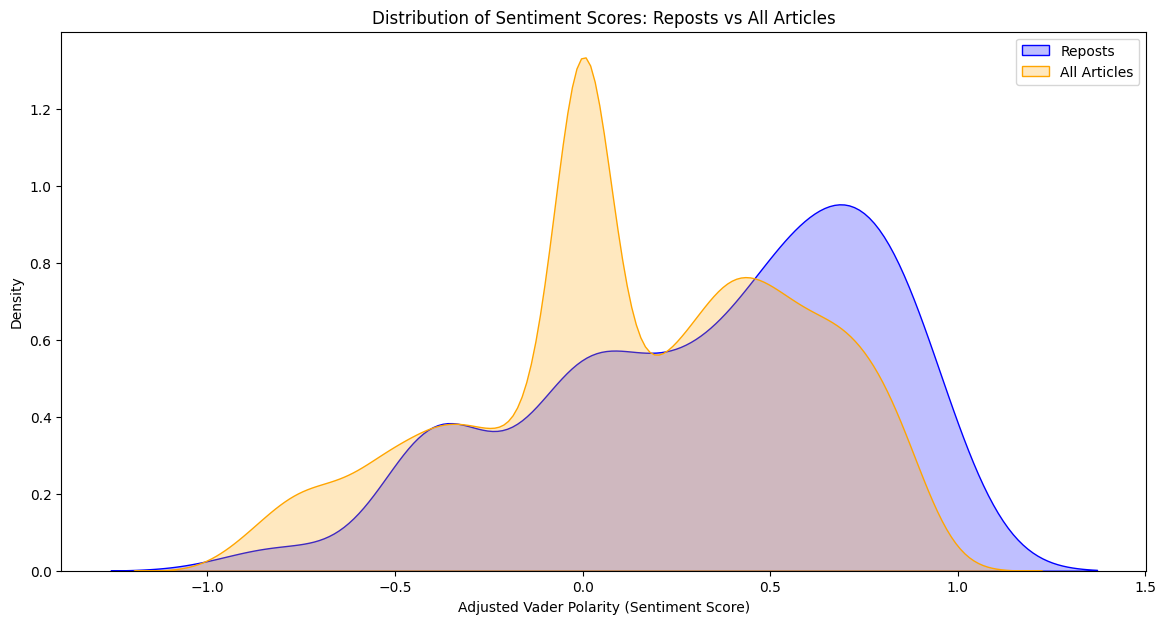

T-statistic: 6.5855, P-value: 0.0000


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Compare the distribution of sentiment scores for reposts vs all articles
plt.figure(figsize=(14, 7))
sns.kdeplot(df[df['is_repost'] == True]['adjusted_vader_polarity'], label='Reposts', fill=True, color="blue")
sns.kdeplot(df['adjusted_vader_polarity'], label='All Articles', fill=True, color="orange")
plt.title('Distribution of Sentiment Scores: Reposts vs All Articles')
plt.xlabel('Adjusted Vader Polarity (Sentiment Score)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Additionally, we want to perform a t-test to see if the difference in means is statistically significant
t_stat, p_val = stats.ttest_ind(df[df['is_repost'] == True]['adjusted_vader_polarity'],
                                df['adjusted_vader_polarity'], equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")


## Interpretation of Sentiment Score Distributions and Statistical Significance

### Distribution of Sentiment Scores
The density plot showcases the distribution of sentiment scores for reposted articles (in blue) and for the entirety of articles (in orange). We observe that the distribution for reposts peaks significantly higher on the positive side of the sentiment scale. This suggests that a larger proportion of reposted articles exhibit positive sentiment scores when compared to the general dataset of articles.

### Statistical Analysis
- **T-statistic (6.5855)**: The high T-statistic signifies a substantial difference between the average sentiment scores of reposted articles and the entire collection of articles.
- **P-value (0.0000)**: The negligible P-value indicates that the difference in average sentiment scores is statistically significant and highly unlikely to have occurred by chance.

### Conclusions Drawn from Analysis
- **Positive Sentiment in Reposts**: We find that articles classified as reposts have a notably higher average sentiment score than the entire set of articles. This implies that articles with positive sentiment are reshared more frequently within the dataset.
- **Statistical Significance**: The results from the statistical test are compelling and bolster the hypothesis that positive sentiment is a potential factor in the propensity of an article to be reposted.
- **Implications for Content Sharing**: The analysis implies that in the domain of cryptocurrency news, articles that present a positive sentiment are preferentially redistributed. The inclination to share positively-toned content may be driven by the collective desire to emphasize favorable news or might reflect a bias where readers are more inclined to disseminate information that casts a positive light on their interests in the cryptocurrency market.

This insight is invaluable for understanding content dissemination patterns and reader behavior in the context of cryptocurrency news and discussions.
